In [1]:
import pyabf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import ruptures as rpt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.signal import periodogram

import level_finder as lf
import data_visualization as dv
import level_category as lc
import data_preprocess as dp

In [2]:
def plot_autocorrelation(arr, start_lag=200, end_lag=1000, ylim=(-0.008, 0.008)):
    """
    计算并绘制自相关系数
    :param arr: 输入的时间序列数据
    :param start_lag: 起始滞后阶数
    :param end_lag: 结束滞后阶数
    :param ylim: 纵轴范围（默认-1到1）
    :return: None
    """
    fig,ax=plt.subplots(figsize=(30, 3))
    plot_acf(arr, lags=range(start_lag, end_lag + 1), ax=ax,use_vlines=True)
    ax.set_ylim(ylim)
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    ax.set_title(f"Autocorrelation Function (Lag {start_lag}-{end_lag})")
    plt.show()

In [3]:
def fft_test(arr,ymax=50000):
    # 执行傅里叶变换
    fft_result = np.fft.fft(arr)
    frequencies = np.fft.fftfreq(len(arr))

    # 转换频率为正数并找到对应的幅度
    positive_frequencies = frequencies[: len(frequencies) // 2]
    positive_amplitudes = np.abs(fft_result[: len(fft_result) // 2])

    # 绘制频谱图
    fig,ax =plt.subplots(figsize=(12, 6))
    plt.plot(positive_frequencies, positive_amplitudes)
    ax.set_ylim(0, ymax)
    ax.set_xlim(0, 0.05)#0.05意味着最小周期阈值是20
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Amplitude")
    ax.set_title("Frequency Domain")
    plt.show()

In [4]:
def PSD_test(arr):
    freq, power = periodogram(arr)
    period = 1 / freq[np.argmax(power)]
    print(f"The period of the time series is {period}")

    plt.plot(freq, power)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power spectral density")
    plt.show()

In [5]:
abf_06190011 = pyabf.ABF("inputs/2024_06_19_0011.abf")

In [6]:
abf_06190011 = lf.downsample(abf_06190011, 100)
arr_06190011 = dp.abf2arr(abf_06190011)

In [7]:
# 周期性检测：标志物X
# 找出并打印所有超过70的点
exceeding_indices = [i/5000+4.227 for i, x in enumerate(arr_06190011[int(4.227 * 5000) : int(50.3074 * 5000)]) if x > 70]

# 打印结果
formatted_indices = [f"{index:.3f}" for index in exceeding_indices]
print("超过70的点的时刻:", formatted_indices)   

超过70的点的时刻: ['7.116', '7.341', '7.732', '8.014', '8.110', '8.571', '8.571', '12.716', '12.716', '12.991', '14.866', '15.440', '15.440', '15.440', '19.898', '20.093', '25.783', '26.187', '26.842', '28.597', '34.090', '40.365', '42.069', '47.343', '47.604']


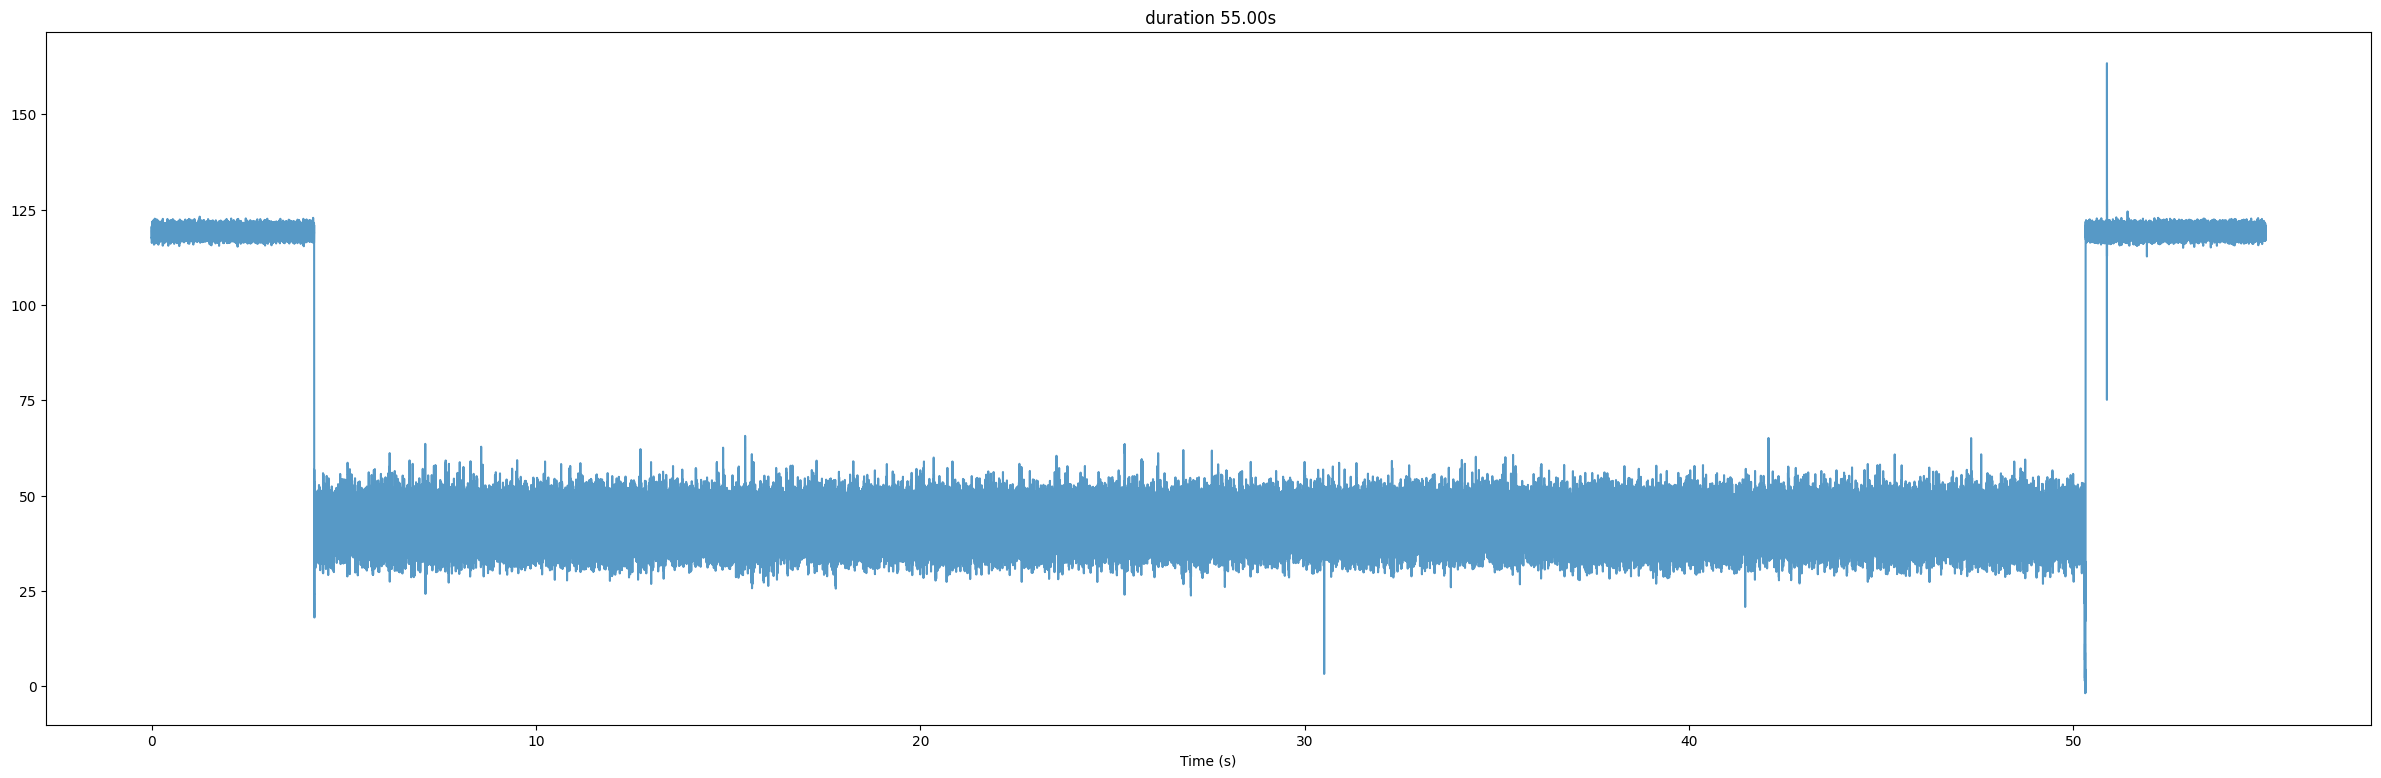

In [8]:
arr_06190011 = dp.replace_outliers_with_bounds(arr_06190011)
fig = dv.plot_arr(arr_06190011[0: int(55 * 5000)])

In [9]:
i_ranges,t_ranges=lf.find_events_arr(arr_06190011)
print(t_ranges)

[(4.227, 50.3208)]


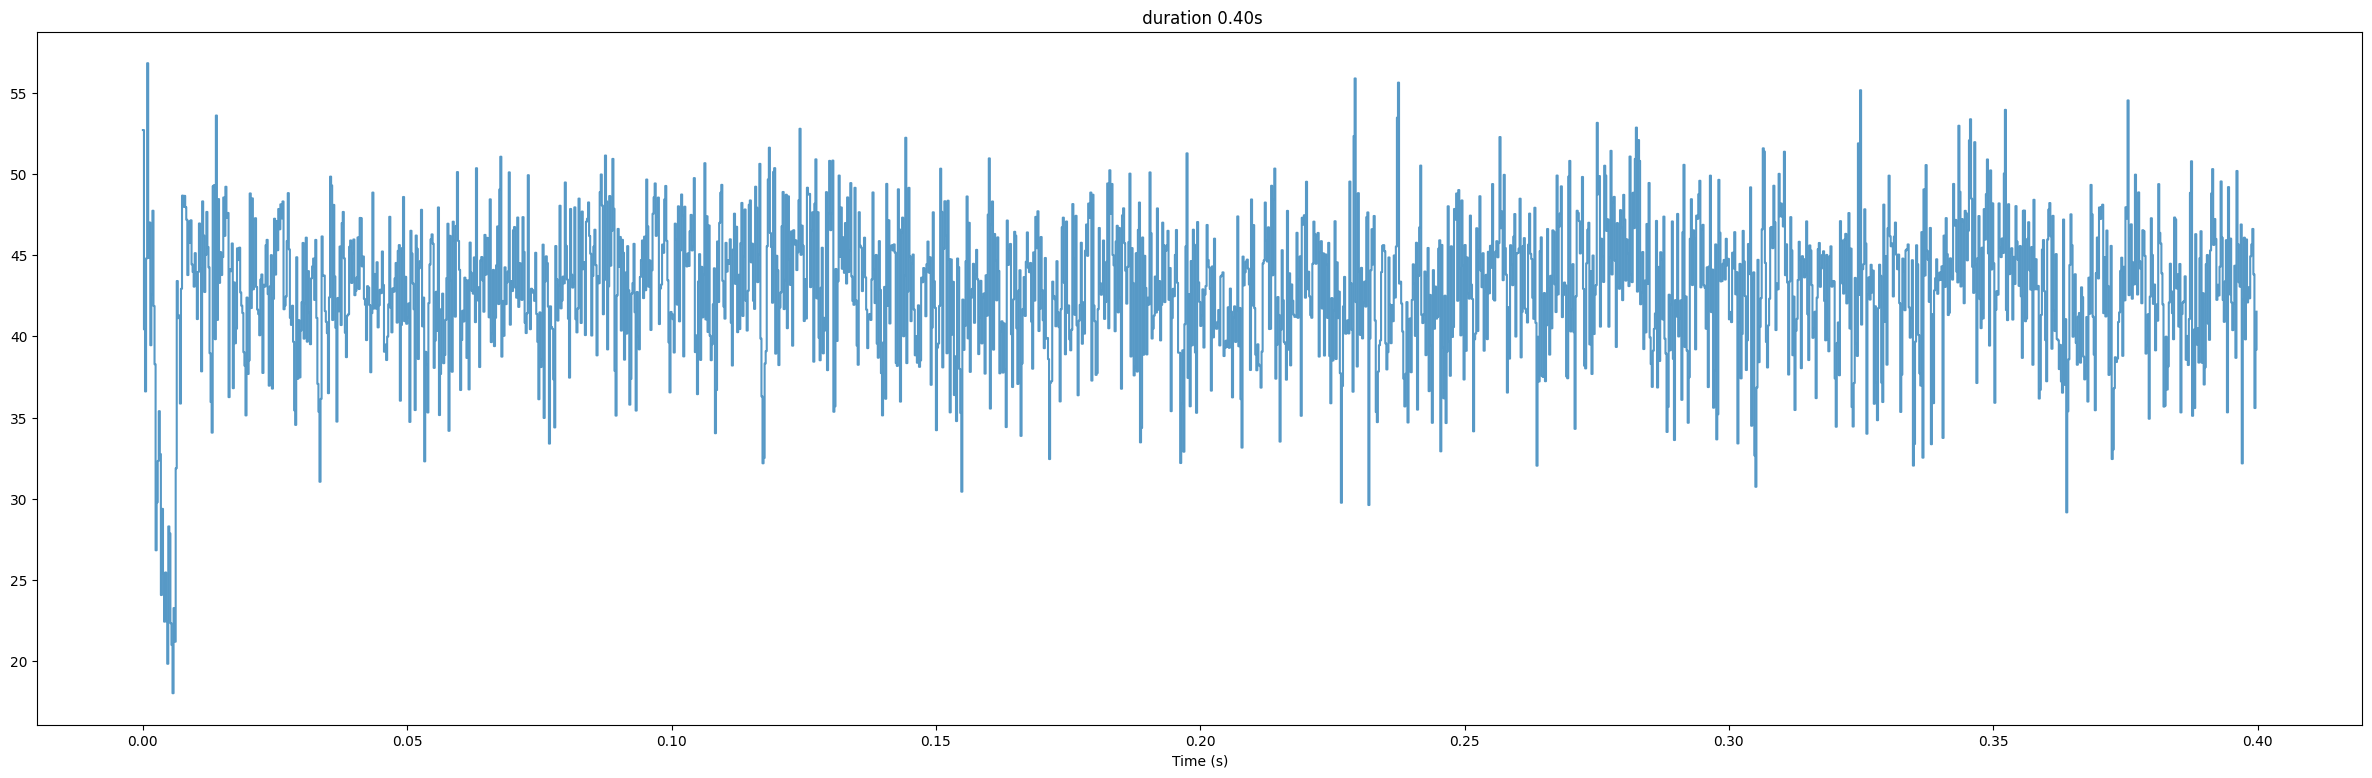

In [10]:
fig = dv.plot_arr(arr_06190011[i_ranges[0][0] : i_ranges[0][0]+2000])

In [11]:
# 06190011 取第一个事件开始后的0.01秒---第一个事件结束
arr_06190011 = arr_06190011[i_ranges[0][0]+int(0.01*5000):i_ranges[0][1]]

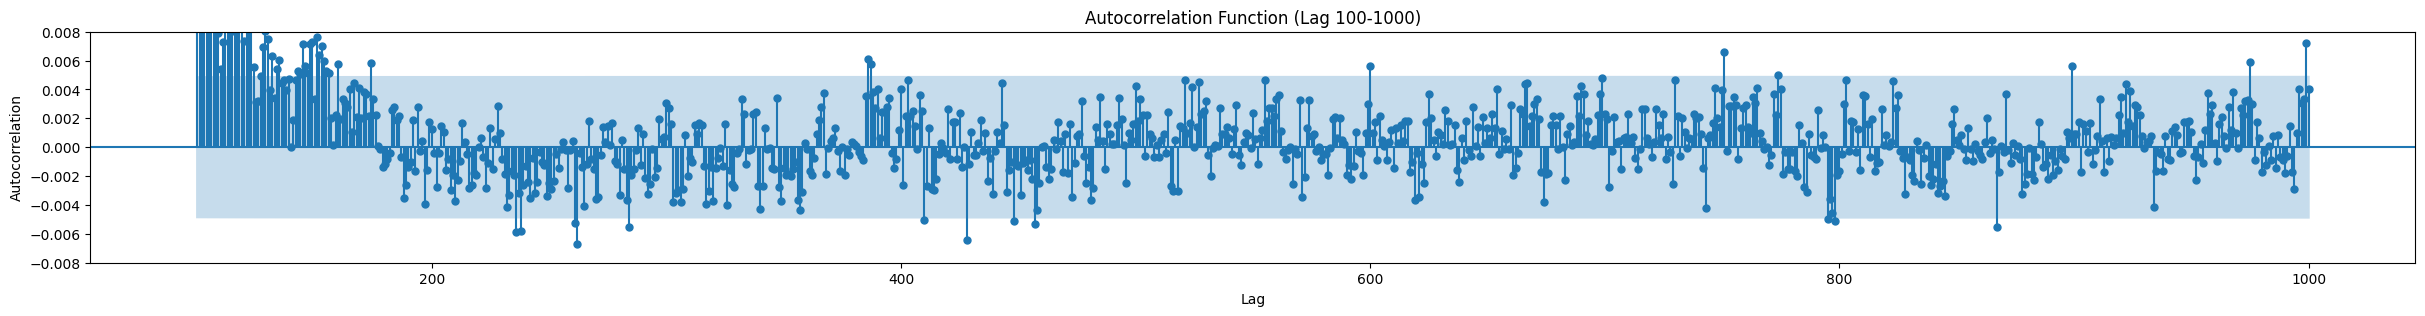

In [12]:
# 周期性检测：自相关系数
plot_autocorrelation(arr_06190011,start_lag=100,end_lag=1000)

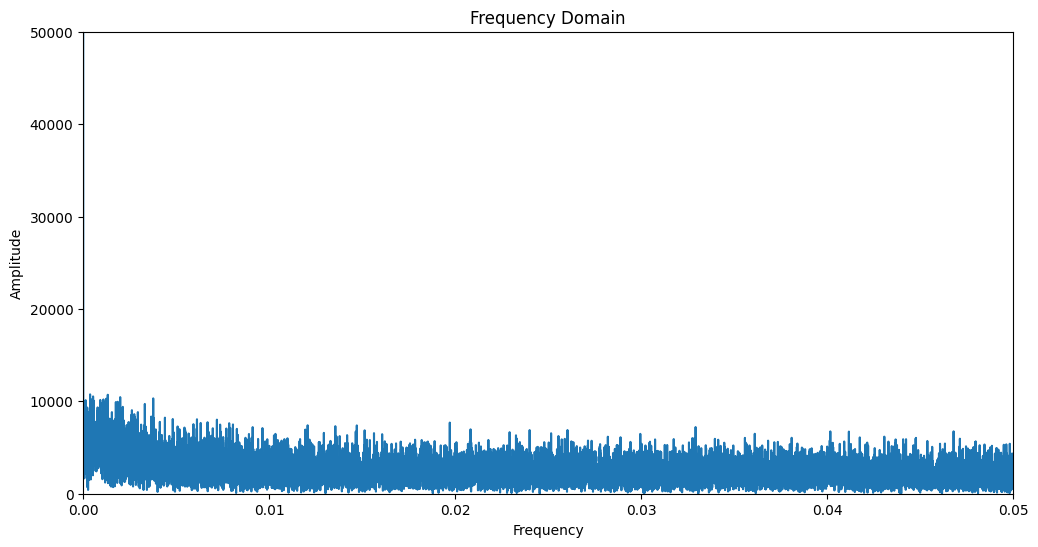

In [13]:
# 周期性检测：傅里叶变换
fft_test(arr_06190011)

The period of the time series is 2679.290697674419


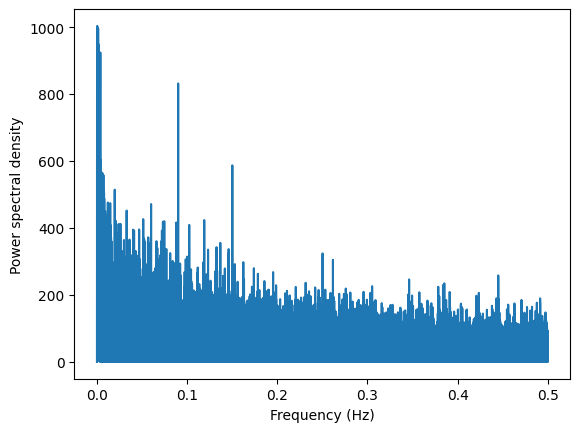

In [14]:
# 周期性检测：功率谱密度(PSD)图
PSD_test(arr_06190011)

---

In [15]:
abf_06210003 = pyabf.ABF("inputs/2024_06_21_0003.abf")

In [16]:
abf_06210003 = lf.downsample(abf_06210003, 100)
arr_06210003 = dp.abf2arr(abf_06210003)

In [17]:
# 周期性检测：标志物X
# 找出并打印所有超过70的点
exceeding_indices = [
    i / 5000 + 58.41 for i, x in enumerate(arr_06190011[int(58.41* 5000) : int(60.456 * 5000)]) if x > 70
]

# 打印结果
formatted_indices = [f"{index:.3f}" for index in exceeding_indices]
print("超过70的点的时刻:", formatted_indices)

超过70的点的时刻: []


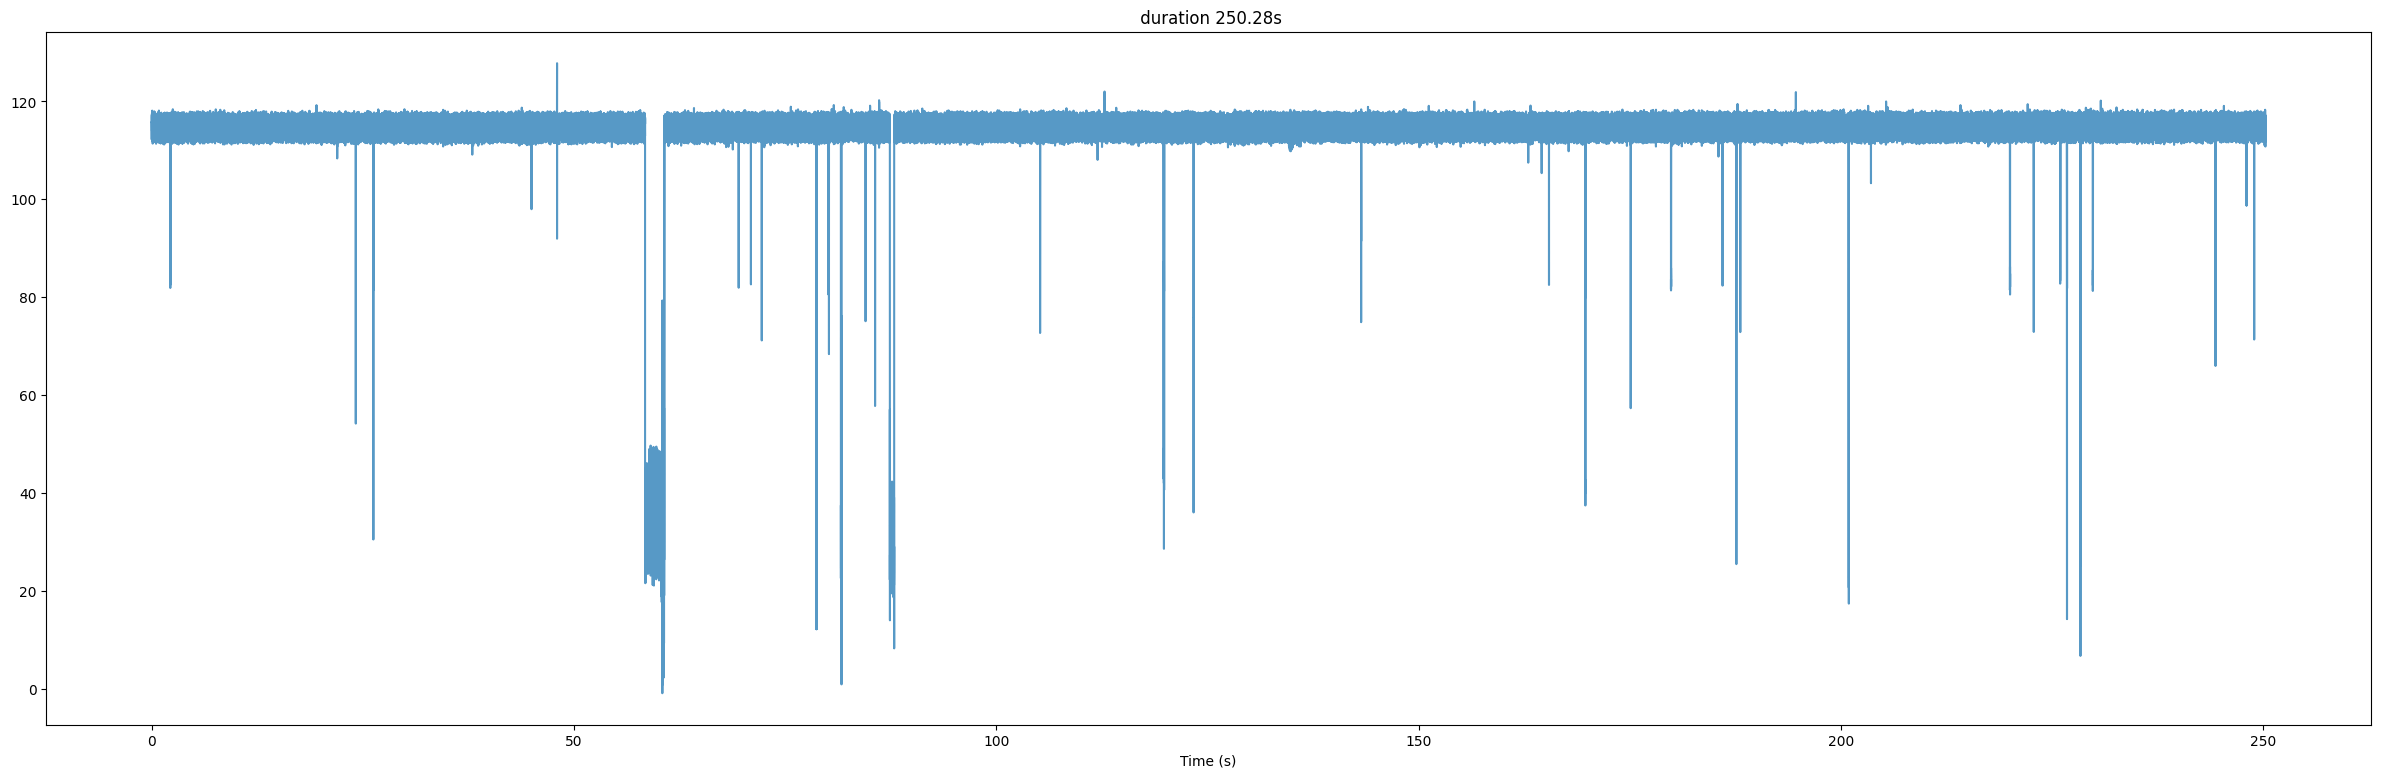

In [18]:
arr_06210003 = dp.replace_outliers_with_bounds(arr_06210003)
fig = dv.plot_arr(arr_06210003)

In [19]:
i_ranges,t_ranges=lf.find_events_arr(arr_06210003)
print(t_ranges)

[(58.41, 60.6686), (87.396, 87.908)]


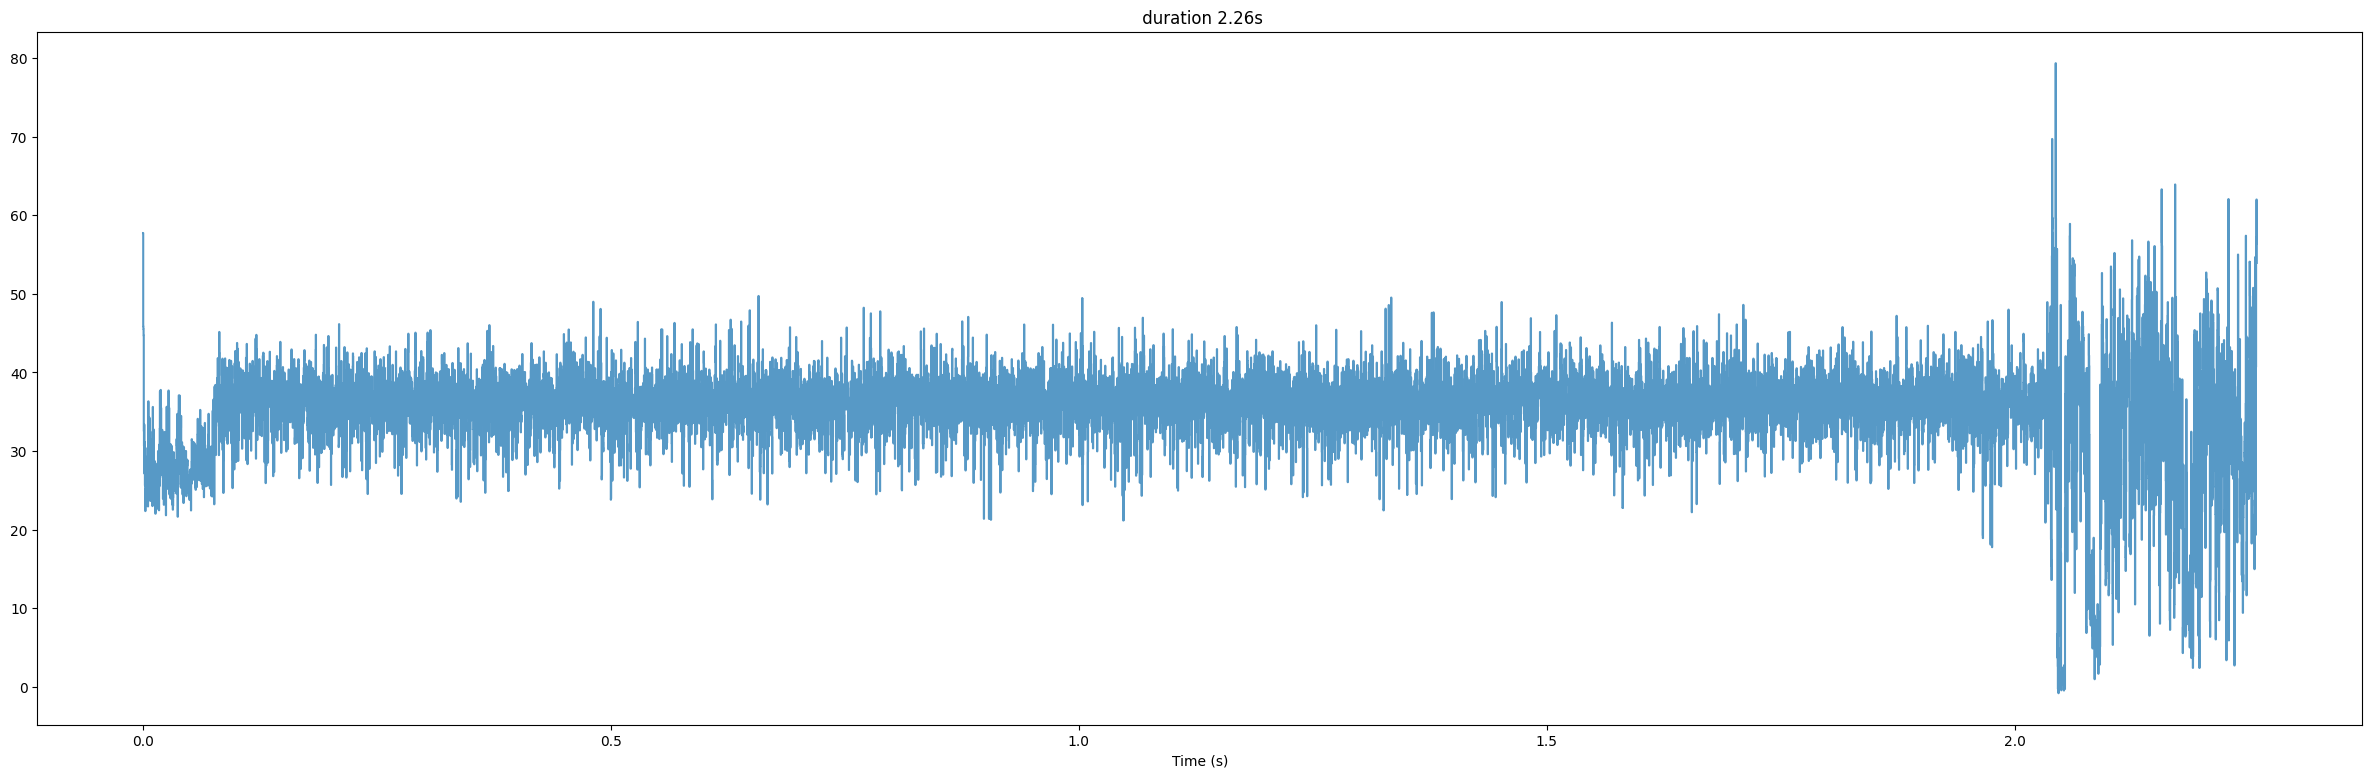

In [20]:
fig = dv.plot_arr(arr_06210003[i_ranges[0][0] : i_ranges[0][1]])

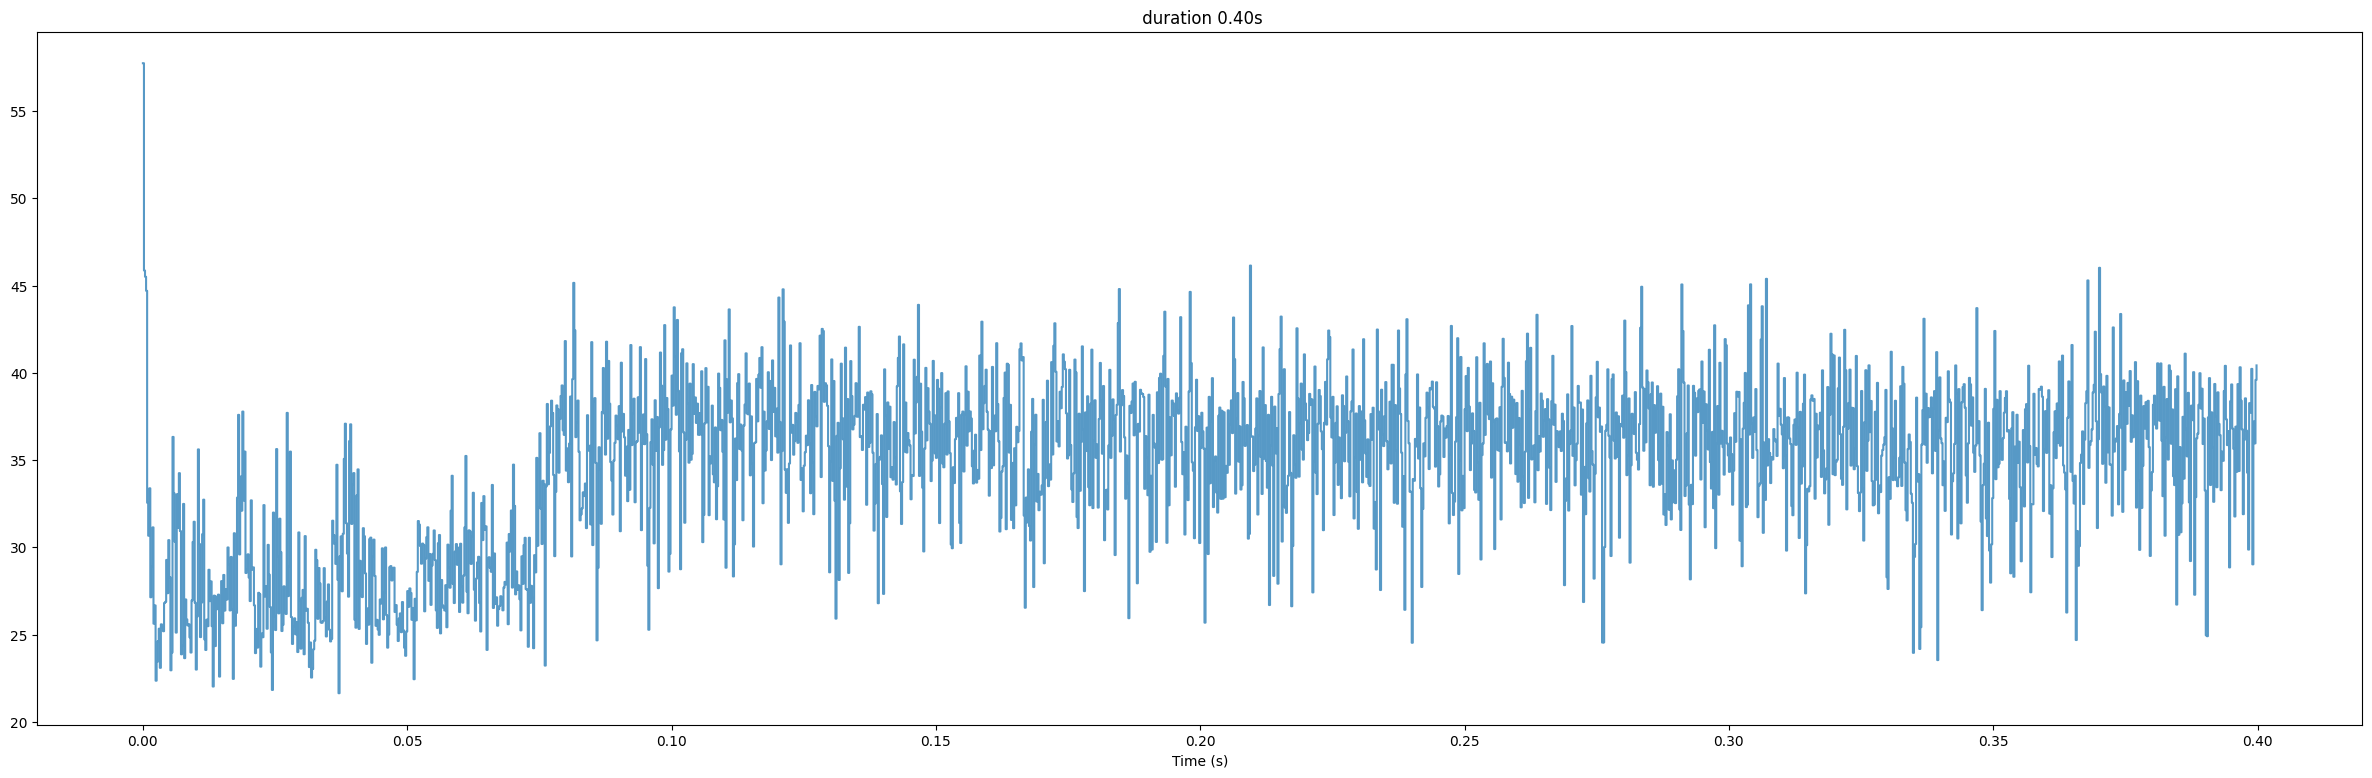

In [21]:
fig = dv.plot_arr(arr_06210003[i_ranges[0][0] : i_ranges[0][0]+2000])

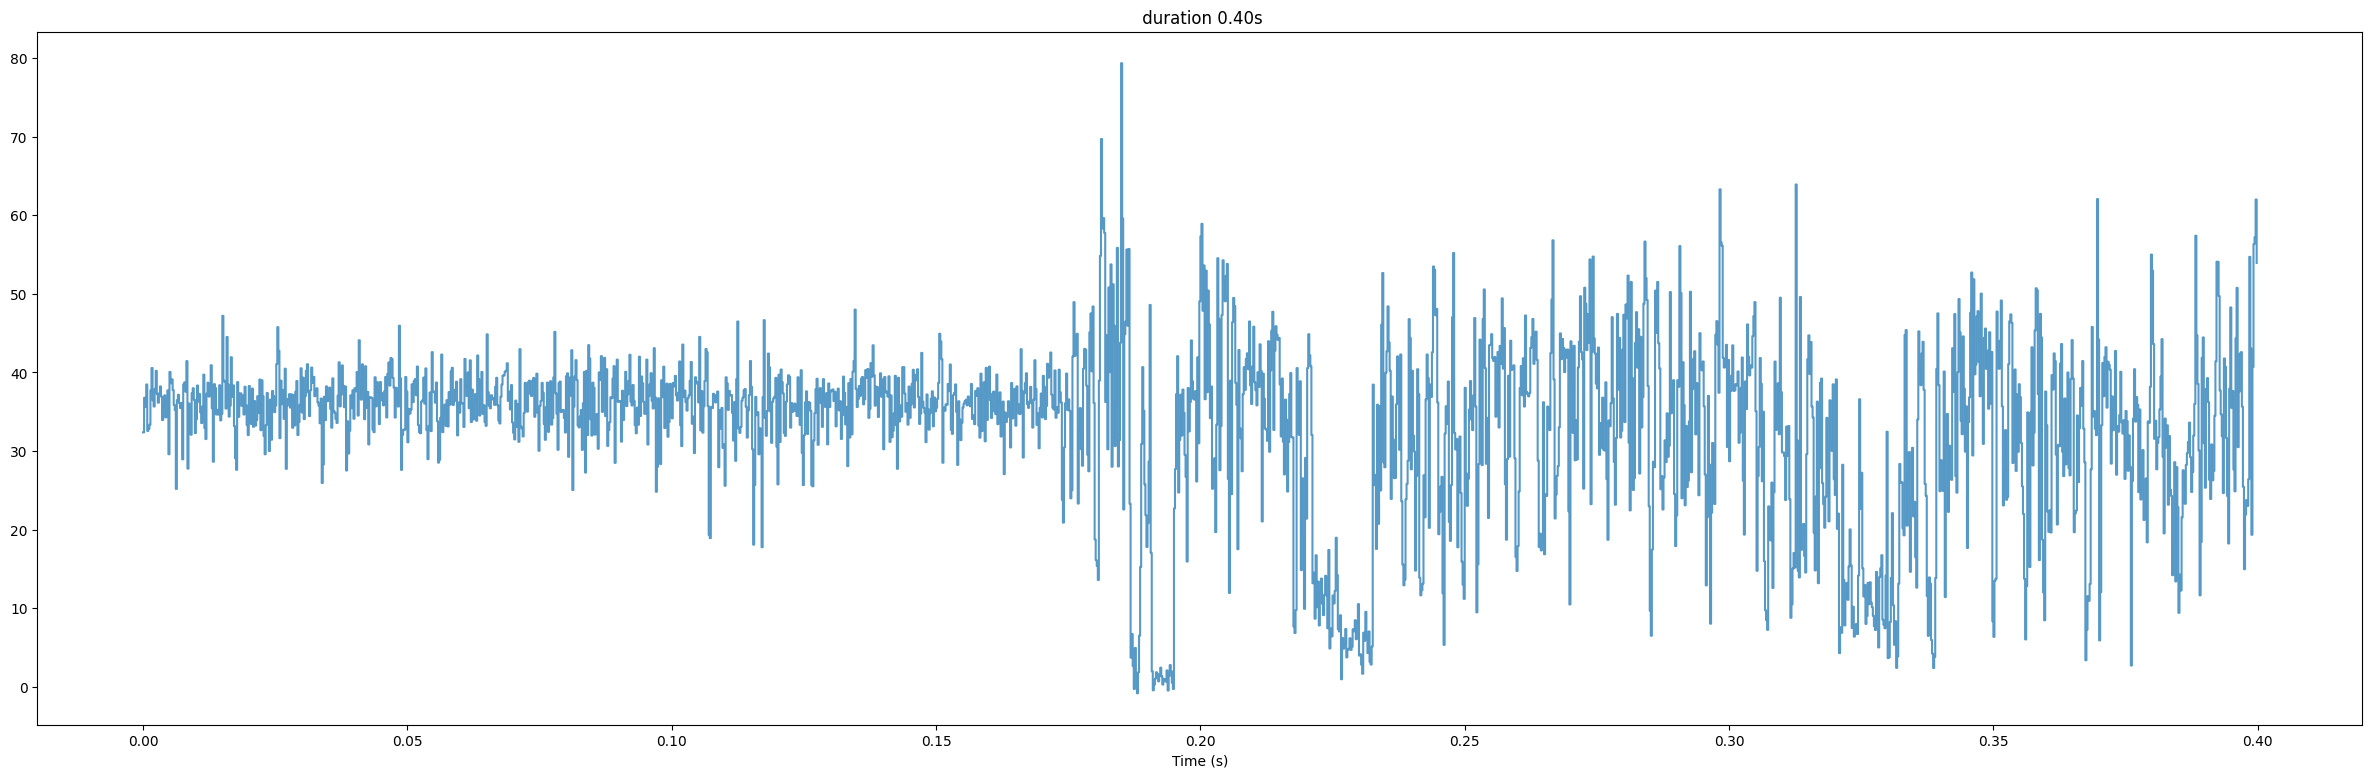

In [22]:
fig = dv.plot_arr(arr_06210003[i_ranges[0][1]-2000 : i_ranges[0][1]])

In [24]:
# 06210003_1 取第一个事件结束前0.25秒-结束
arr_06210003_1 = arr_06210003[i_ranges[0][1]-int(0.25*5000):i_ranges[0][1]]

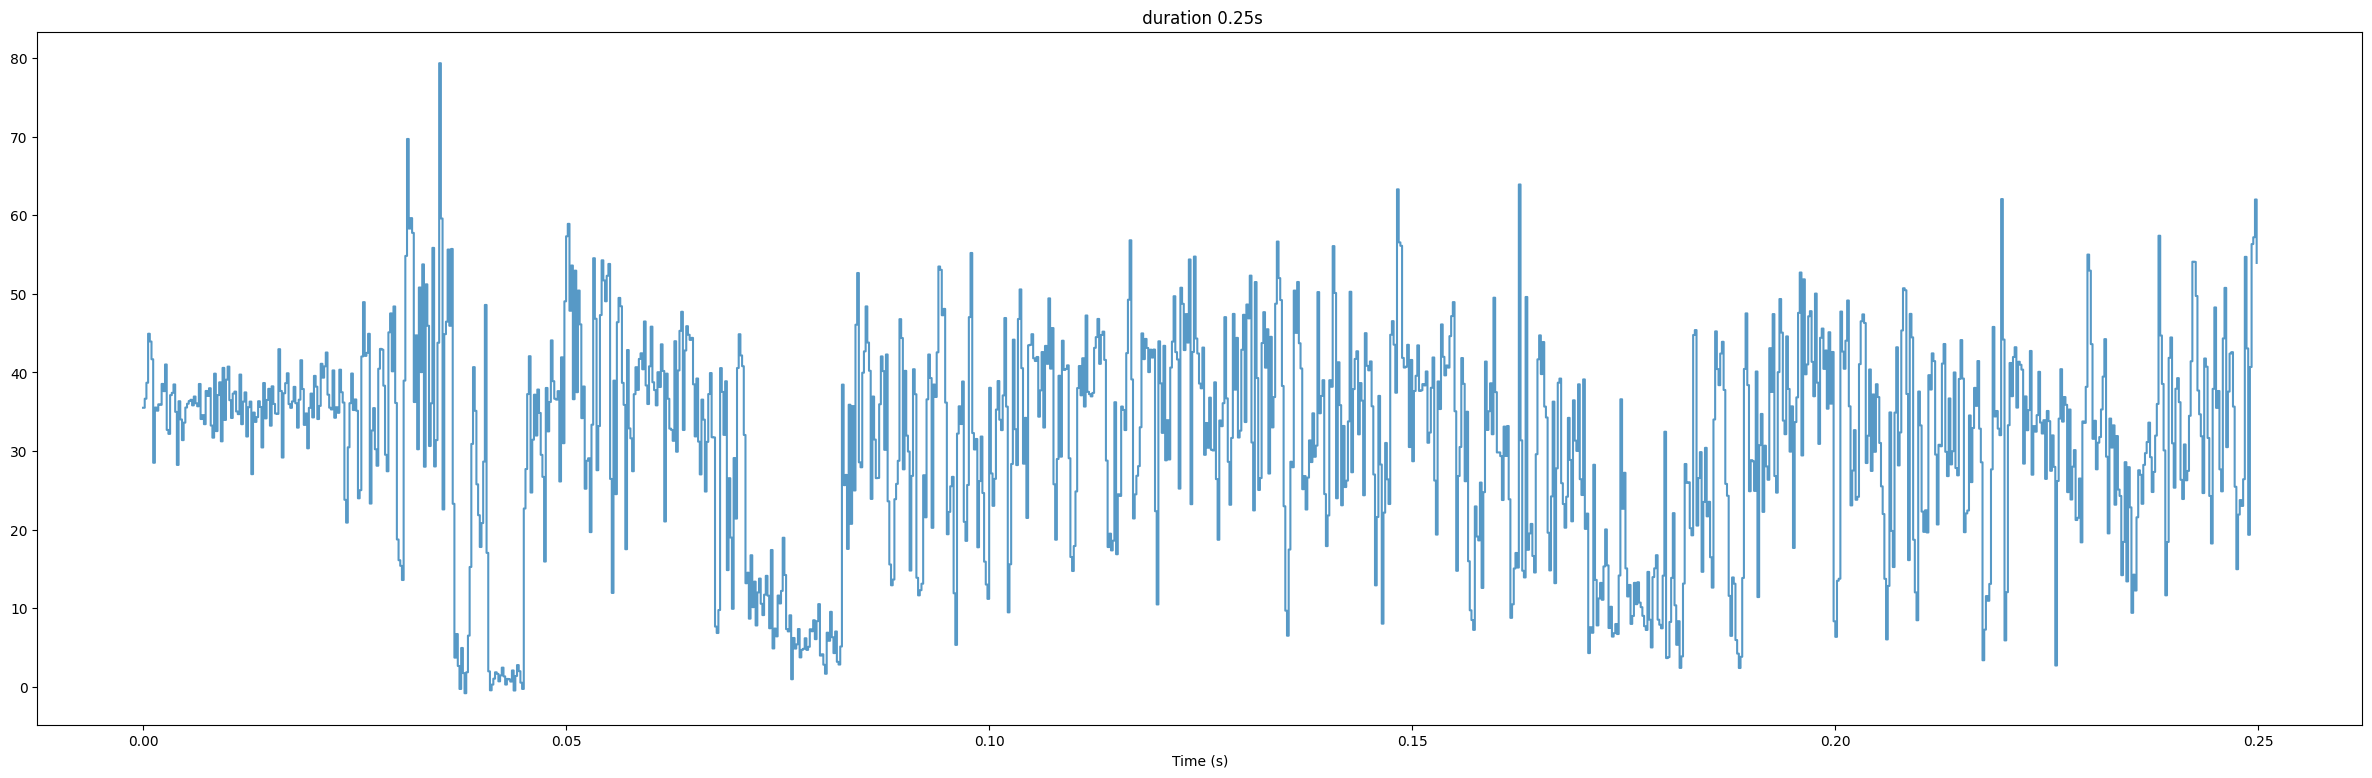

In [25]:
fig = dv.plot_arr(arr_06210003_1)

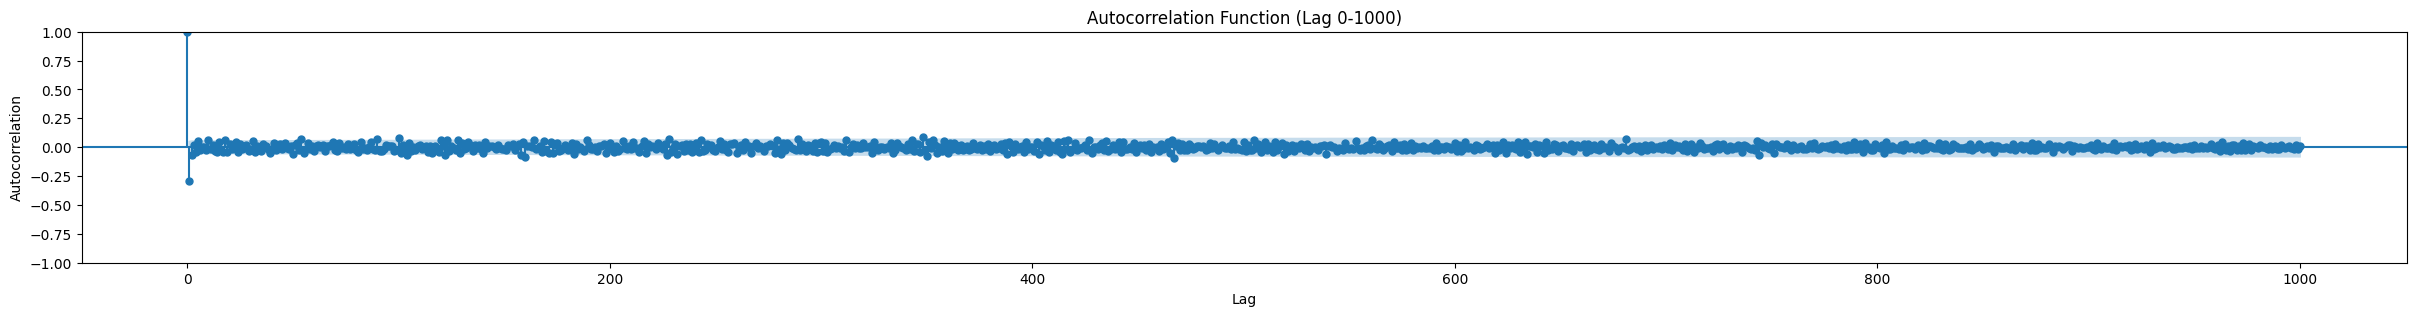

In [ ]:
# 周期性检测：自相关系数
plot_autocorrelation(arr_06210003_1,start_lag=0,end_lag=1000,ylim=(-1,1))

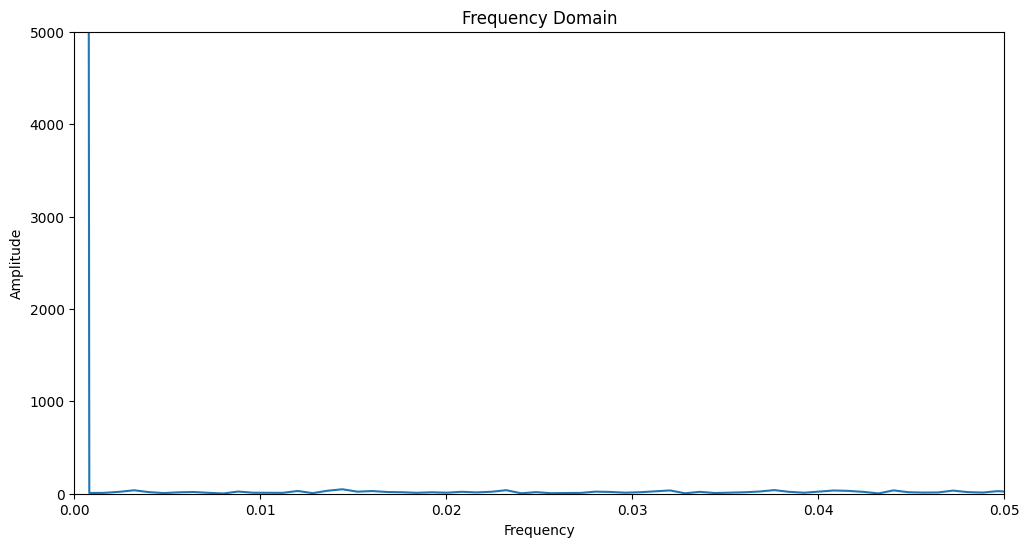

In [ ]:
# 周期性检测：傅里叶变换
fft_test(arr_06210003_1,ymax=5000)

The period of the time series is 2.5594262295081966


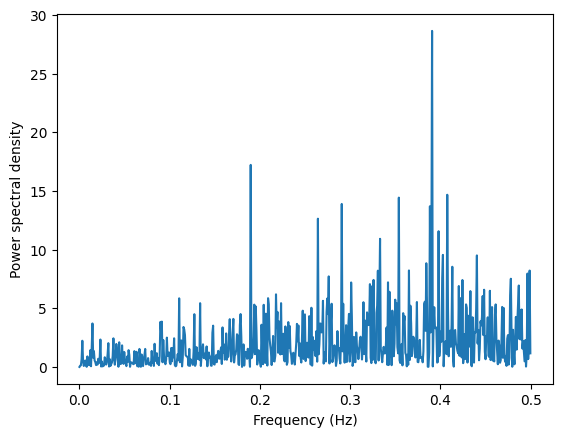

In [ ]:
# 周期性检测：功率谱密度(PSD)图
PSD_test(arr_06210003_1)

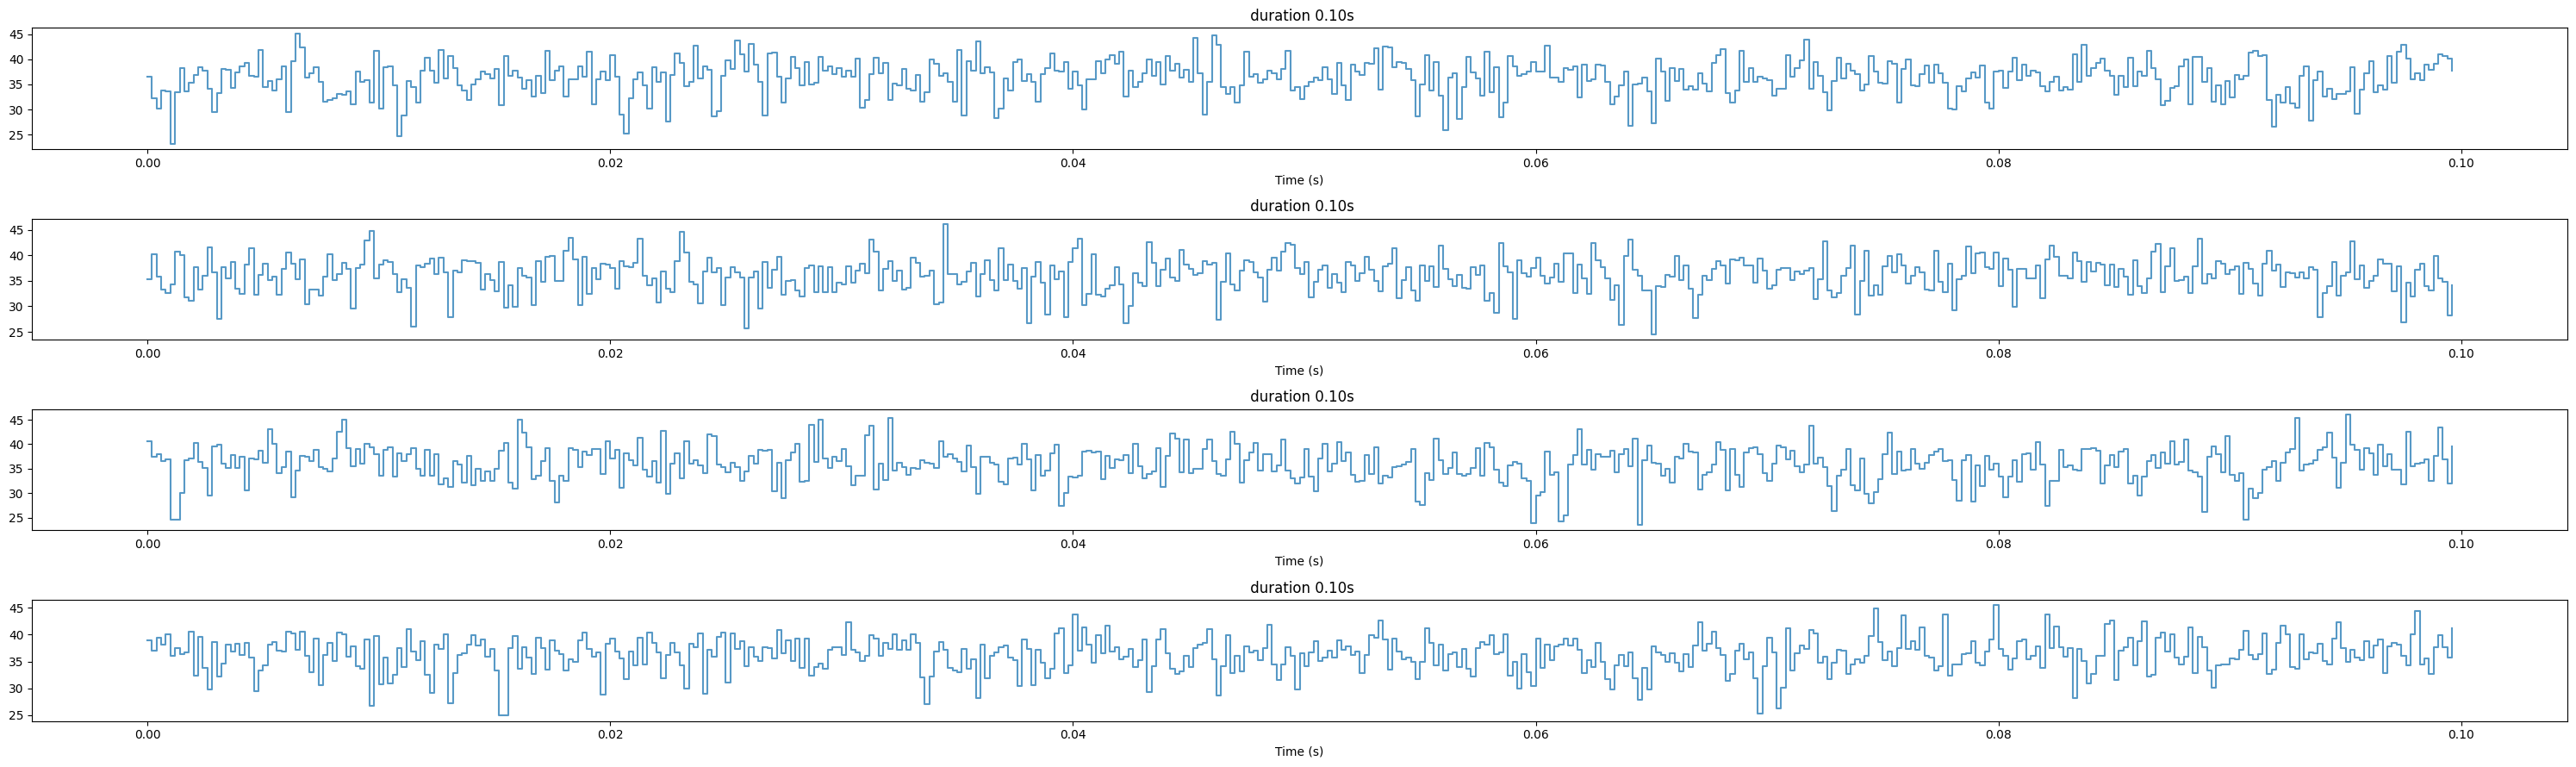

In [ ]:
# fig, axes = plt.subplots(4, 1, figsize=(30, 9))

# # 绘制第一个子图
# dv.plot_arr(arr_06210003_1[0:499], ax=axes[0])  # 传入子图对象

# # 绘制第二个子图
# dv.plot_arr(arr_06210003_1[500:999], ax=axes[1])  # 传入子图对象

# # 绘制第三个子图
# dv.plot_arr(arr_06210003_1[1000:1499], ax=axes[2])  # 传入子图对象

# # 绘制第四个子图
# dv.plot_arr(arr_06210003_1[1500:1999], ax=axes[3])  # 传入子图对象

# # 调整子图之间的间距
# plt.tight_layout()

In [ ]:
# points_arr_1=lf.find_change_points(arr_06210003_1[0:499])
# points_arr_2=lf.find_change_points(arr_06210003_1[500:999])
# points_arr_3=lf.find_change_points(arr_06210003_1[1000:1499])
# points_arr_4=lf.find_change_points(arr_06210003_1[1500:1999])

# print(len(points_arr_1),len(points_arr_2),len(points_arr_3),len(points_arr_4))


43 41 48 45


In [ ]:
# df_06210003_1_1 = lf.calc_level4arr(arr_06210003_1[0:499], points_arr_1)
# df_06210003_1_2 = lf.calc_level4arr(arr_06210003_1[500:999], points_arr_2)
# df_06210003_1_3 = lf.calc_level4arr(arr_06210003_1[1000:1499], points_arr_3)
# df_06210003_1_4 = lf.calc_level4arr(arr_06210003_1[1500:1999], points_arr_4)

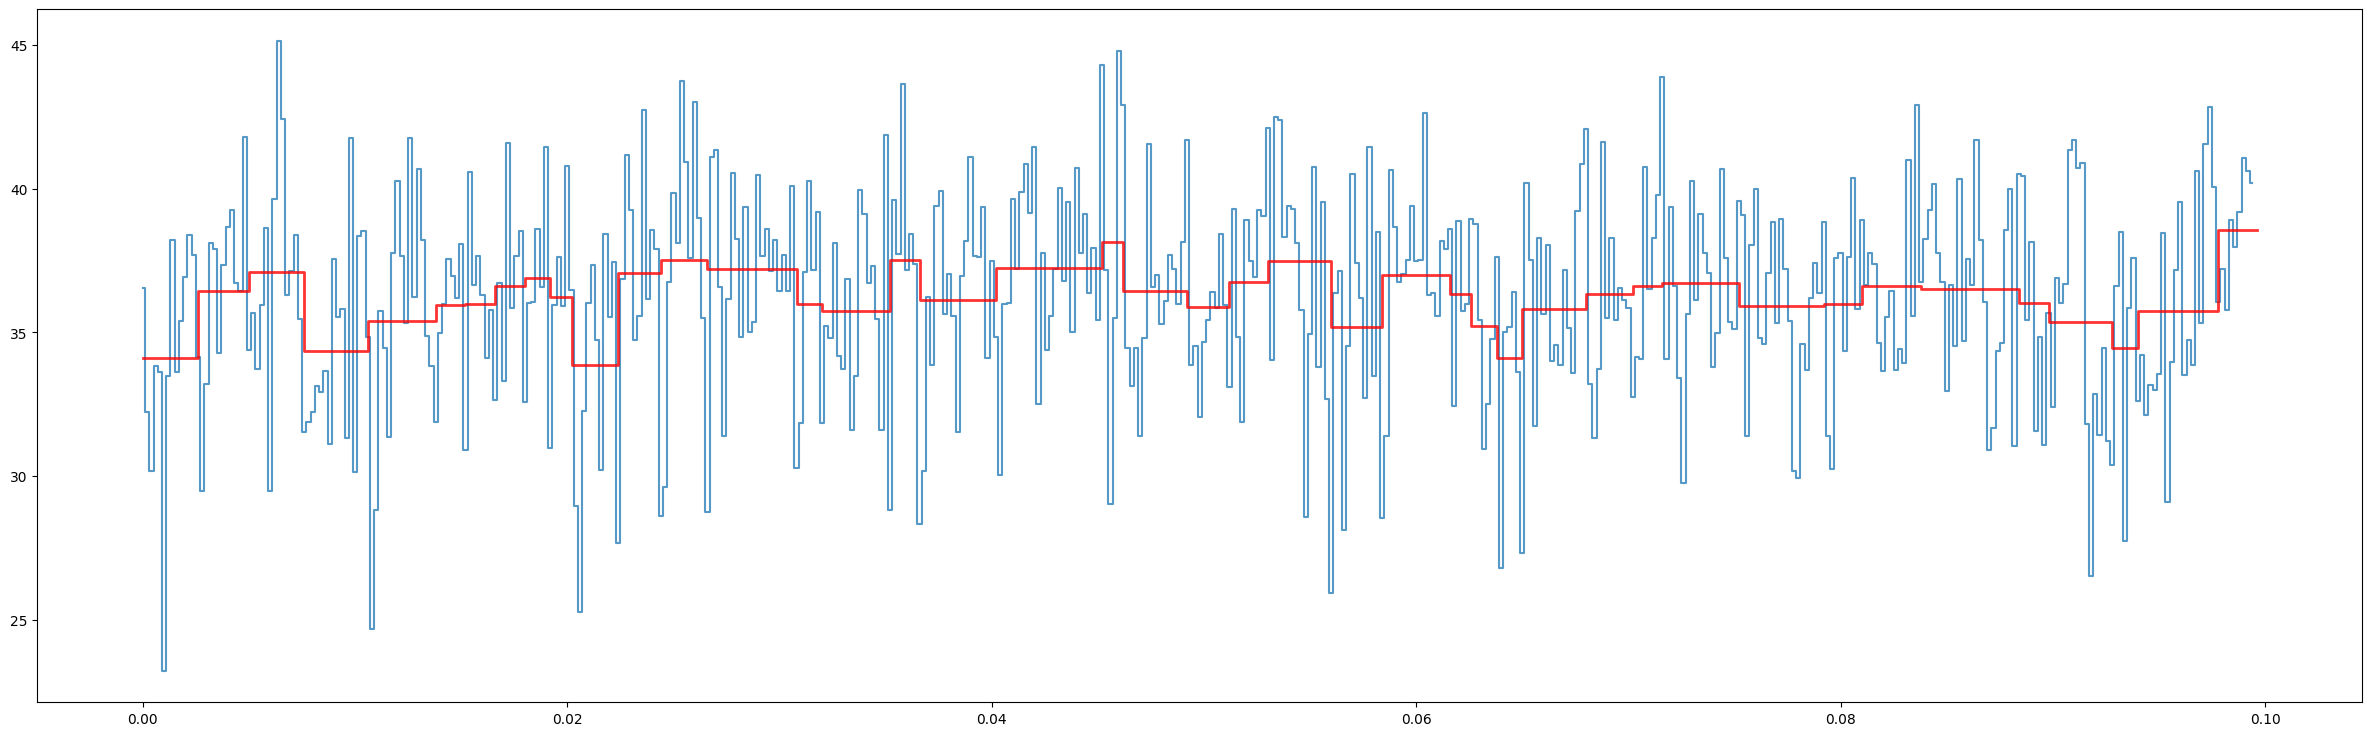

In [ ]:
# fig= dv.step_arr_lvls(arr_06210003_1[0:499], df_06210003_1_1)


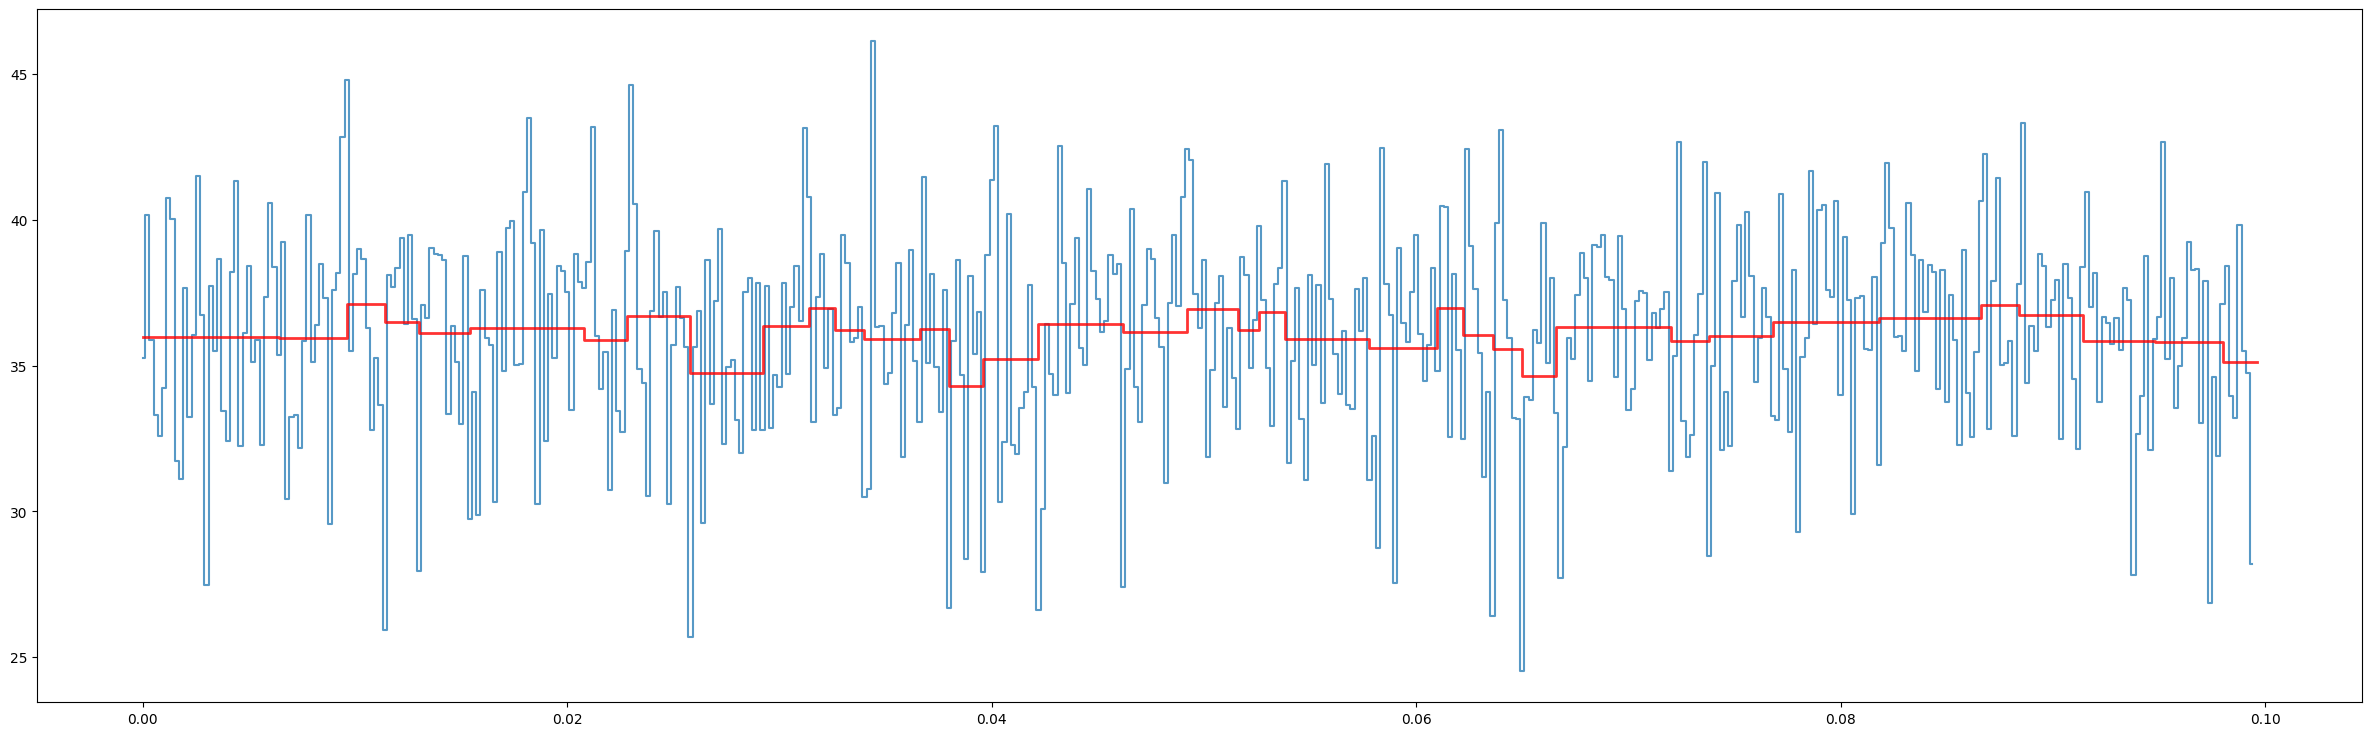

In [ ]:
# fig= dv.step_arr_lvls(arr_06210003_1[500:999], df_06210003_1_2)

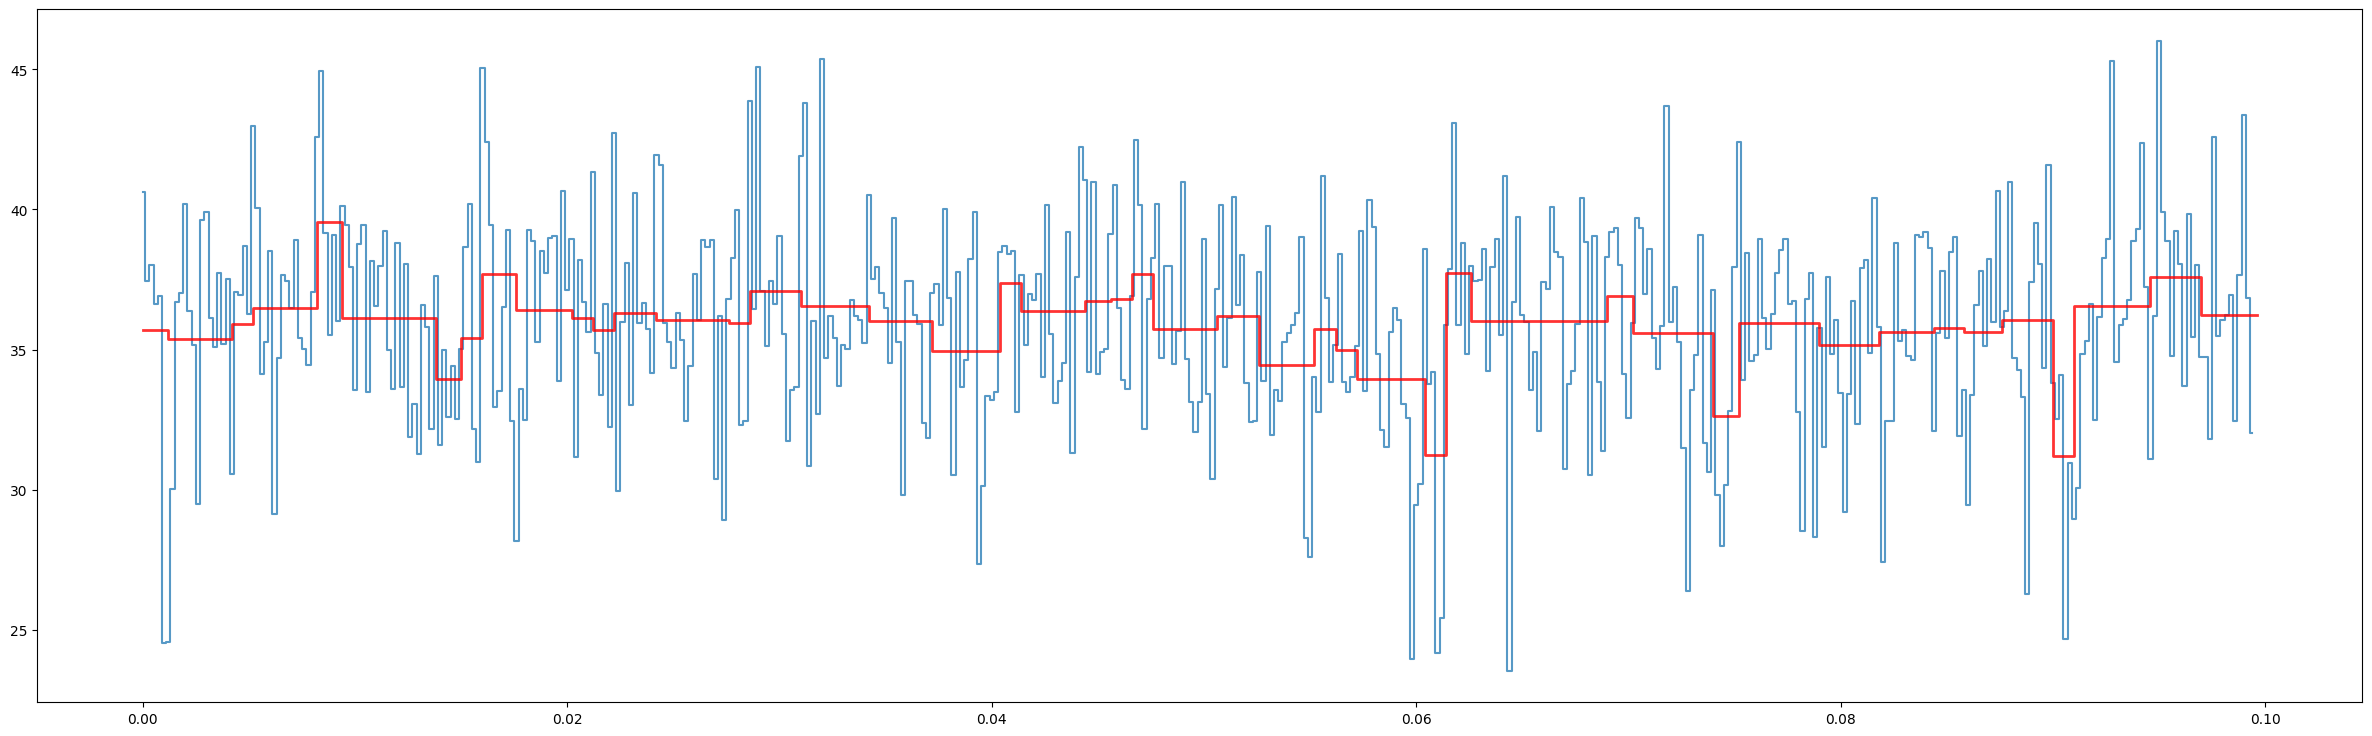

In [ ]:
# fig= dv.step_arr_lvls(arr_06210003_1[1000:1499], df_06210003_1_3)

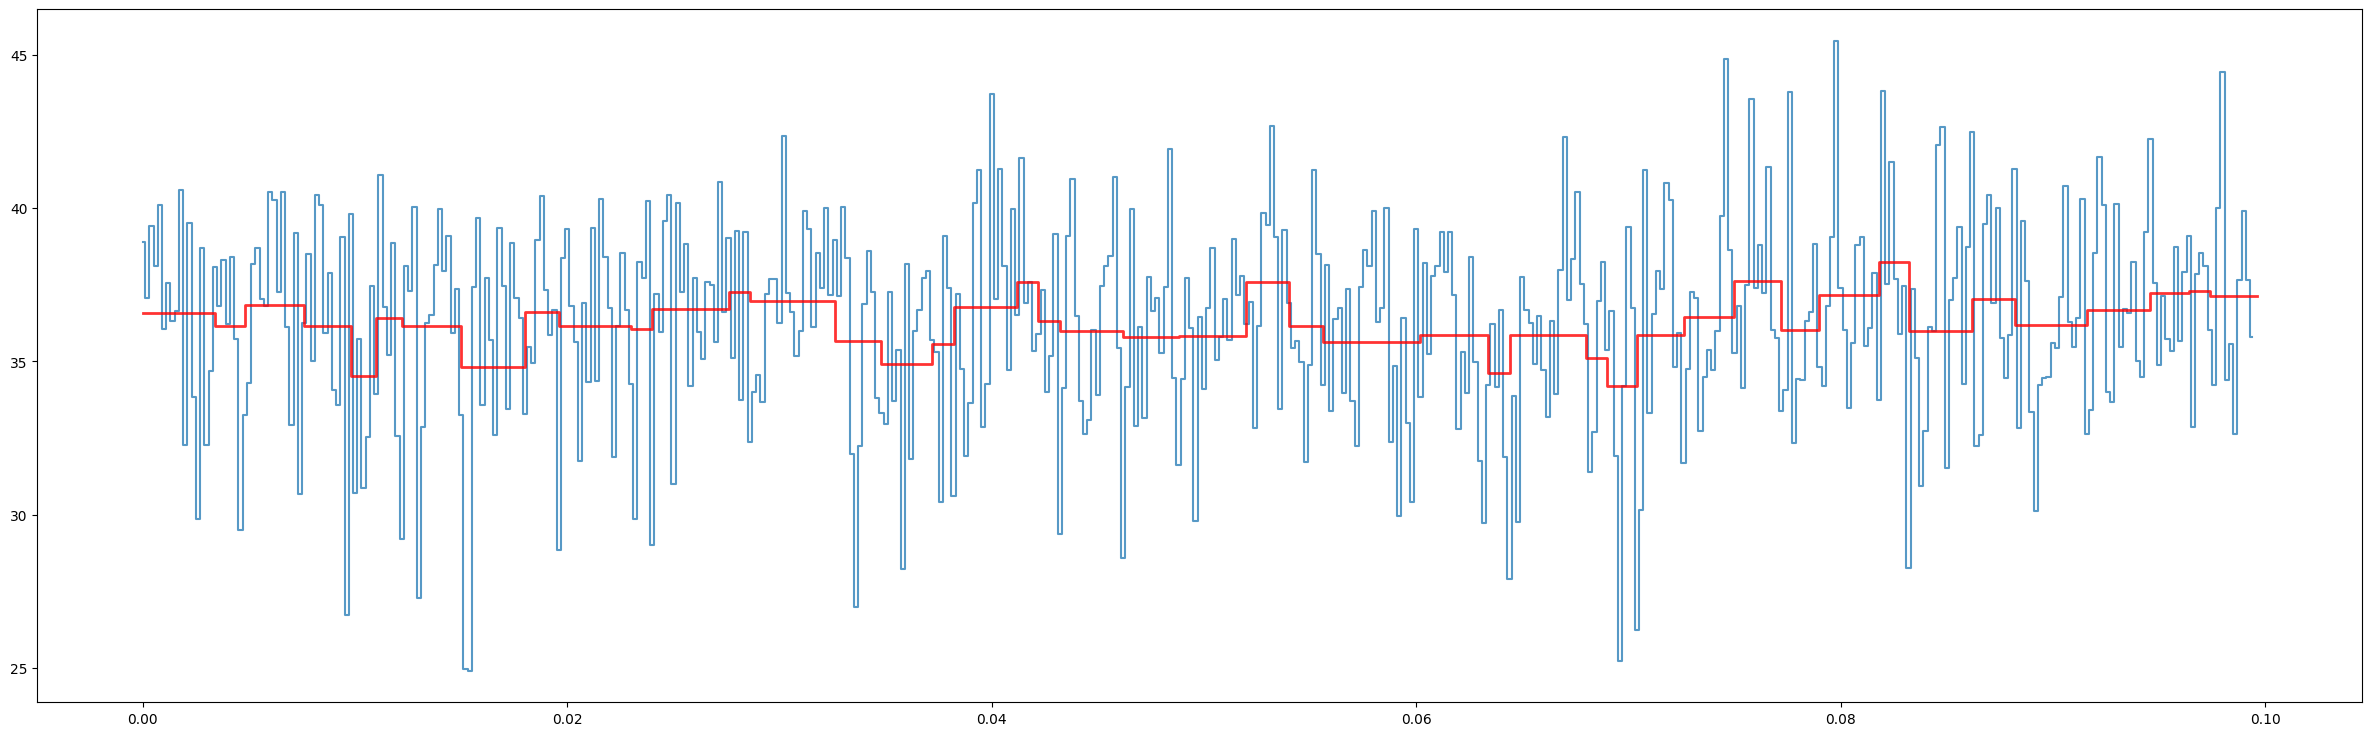

In [ ]:
# fig= dv.step_arr_lvls(arr_06210003_1[1500:1999], df_06210003_1_4)

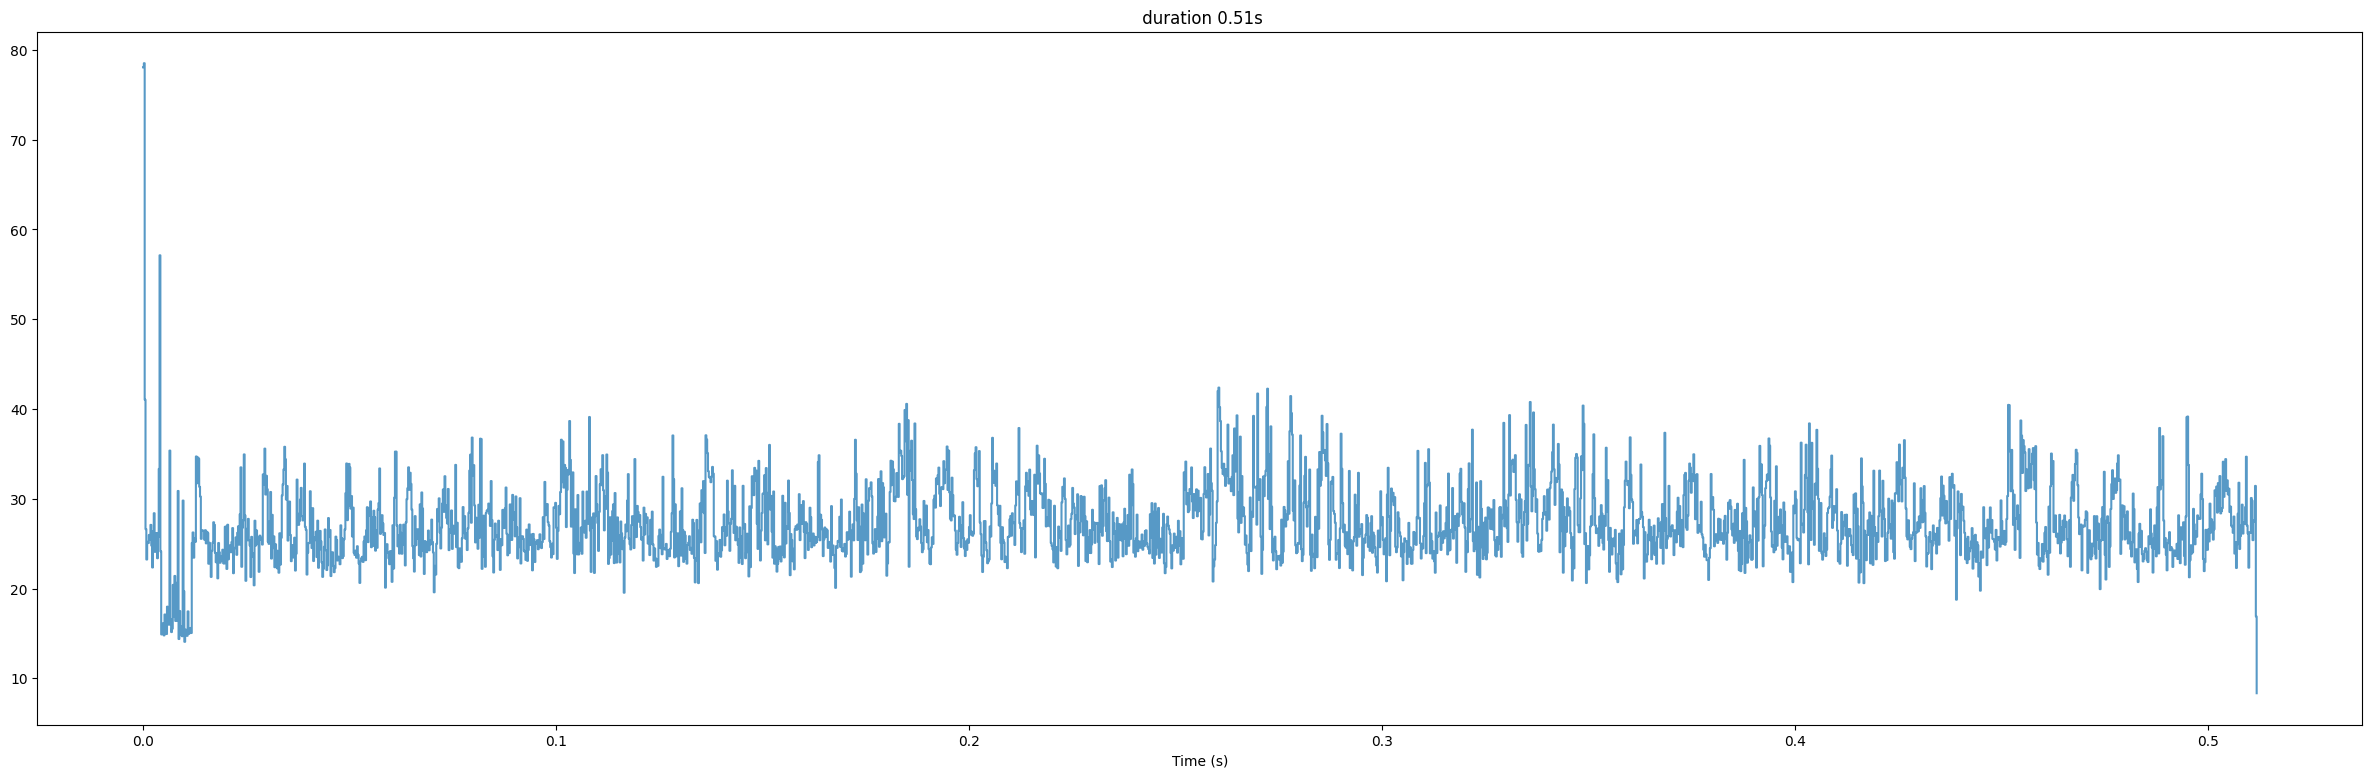

In [ ]:
# fig = dv.plot_arr(arr_06210003[i_ranges[1][0] : i_ranges[1][1]])

In [ ]:
points_arr=lf.find_change_points(arr_06210003_1)
print(len(points_arr))

2


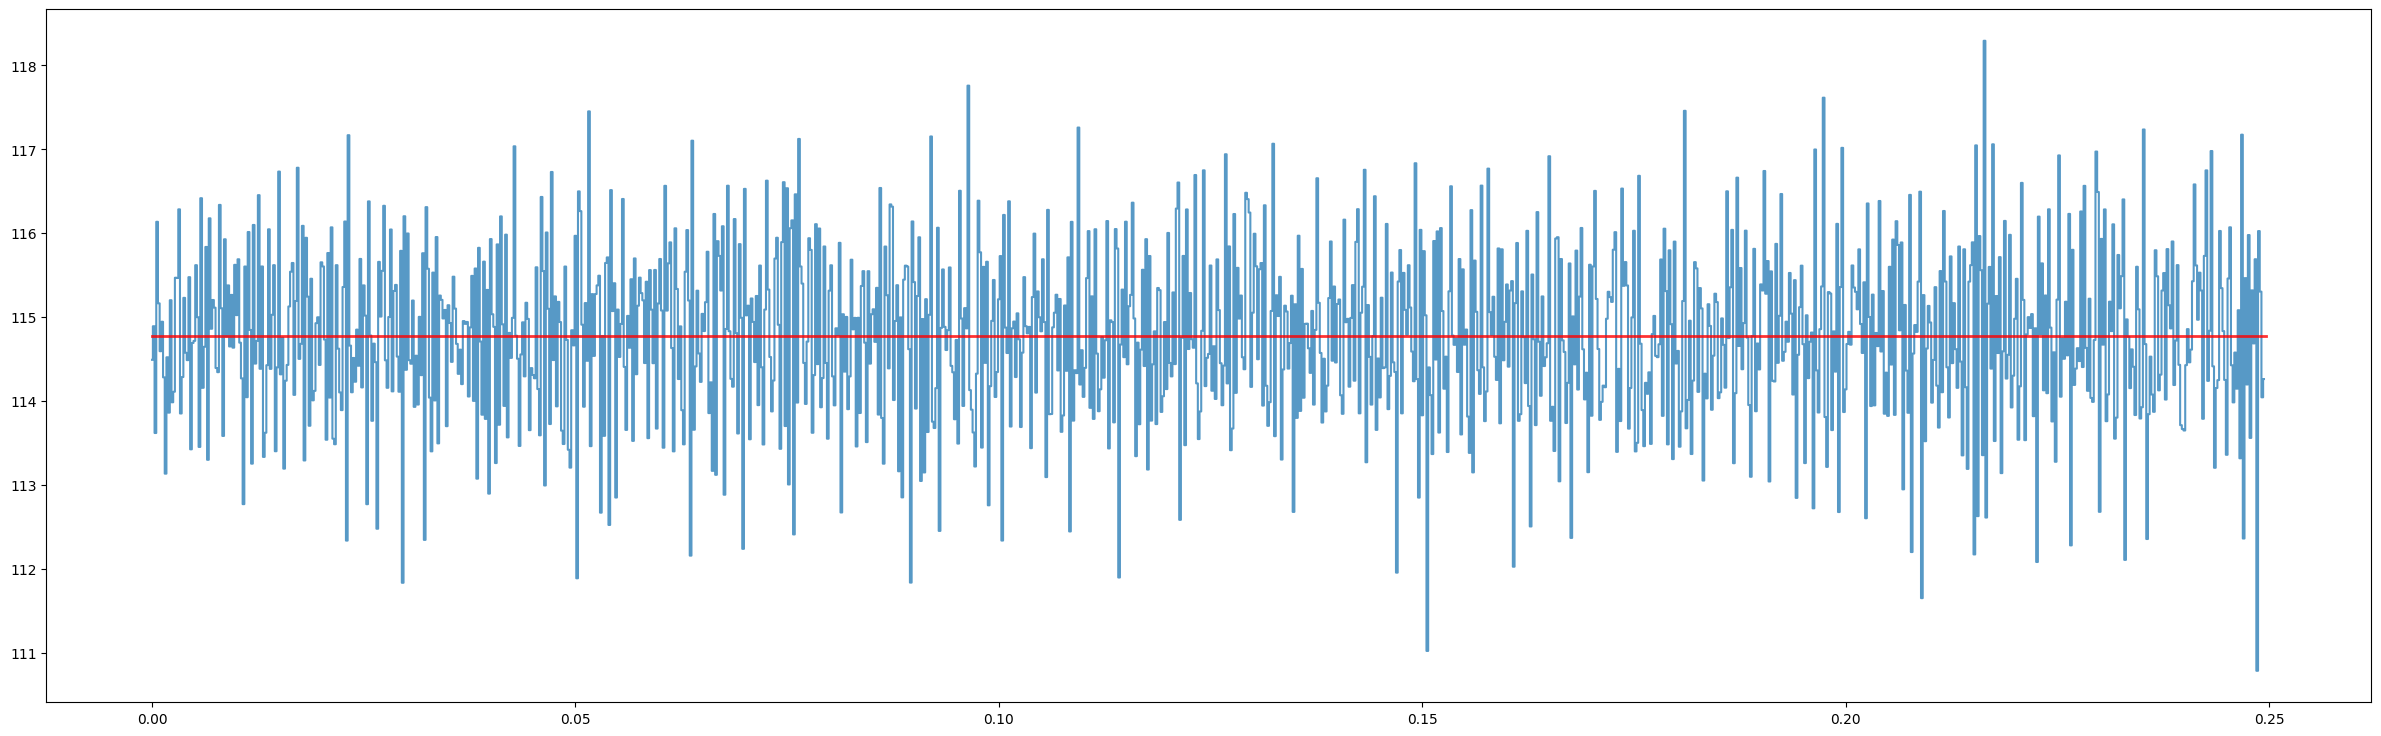

In [ ]:
df_06210003_1 = lf.calc_level4arr(arr_06210003_1, points_arr)
fig= dv.step_arr_lvls(arr_06210003_1, df_06210003_1)

In [ ]:
# 提出df_06210003_1_ttl的

In [ ]:
# 06210003_2 取第二个事件开始后的0.025秒---第二个事件结束
arr_06210003_2 = arr_06210003[i_ranges[1][0]+int(0.025*5000):i_ranges[1][1]]

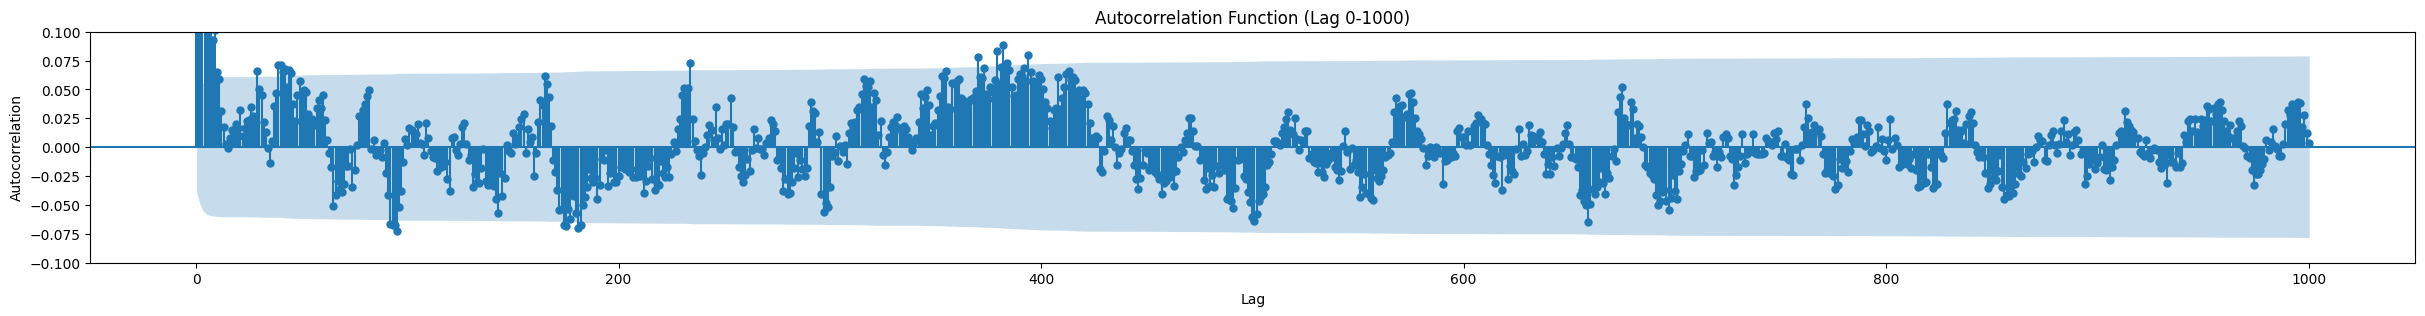

In [ ]:
# 周期性检测：自相关系数
plot_autocorrelation(arr_06210003_2,start_lag=0,end_lag=1000,ylim=(-0.1,0.1))

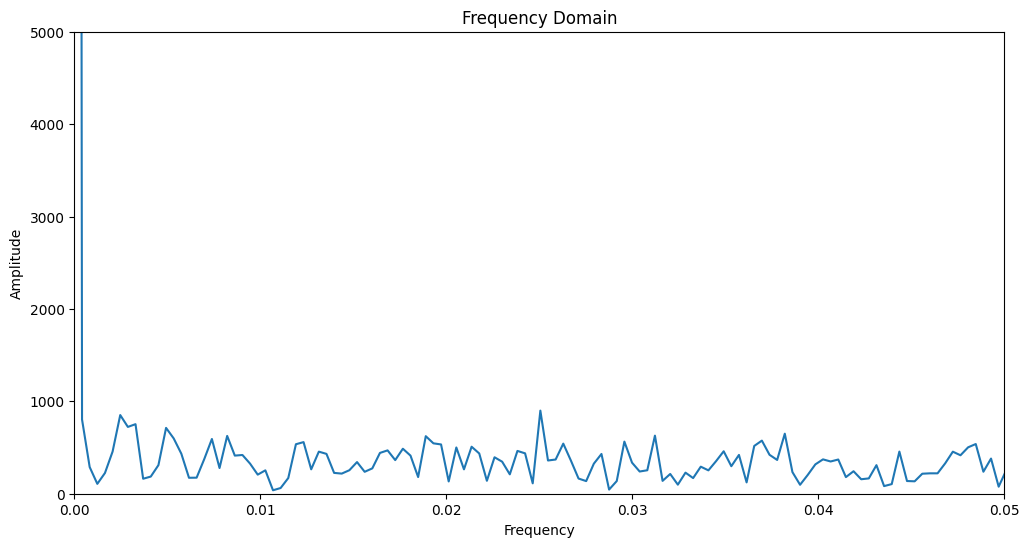

In [ ]:
# 周期性检测：傅里叶变换
fft_test(arr_06210003_2,5000)


The period of the time series is 39.91803278688525


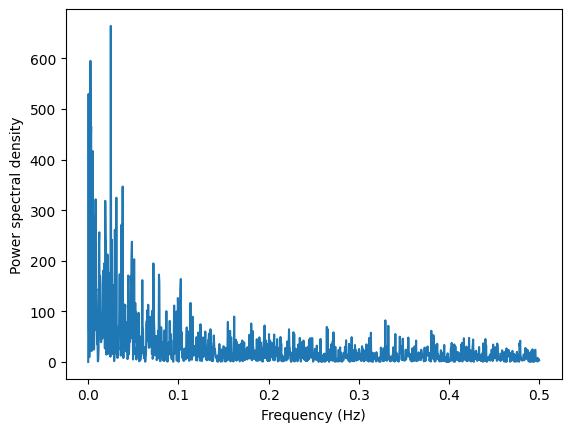

In [ ]:
# 周期性检测：功率谱密度(PSD)图
PSD_test(arr_06210003_2)

---

In [ ]:
abf_06210004 = pyabf.ABF("inputs/2024_06_21_0004.abf")

In [ ]:
abf_06210004 = lf.downsample(abf_06210004, 100)
arr_06210004 = dp.abf2arr(abf_06210004)

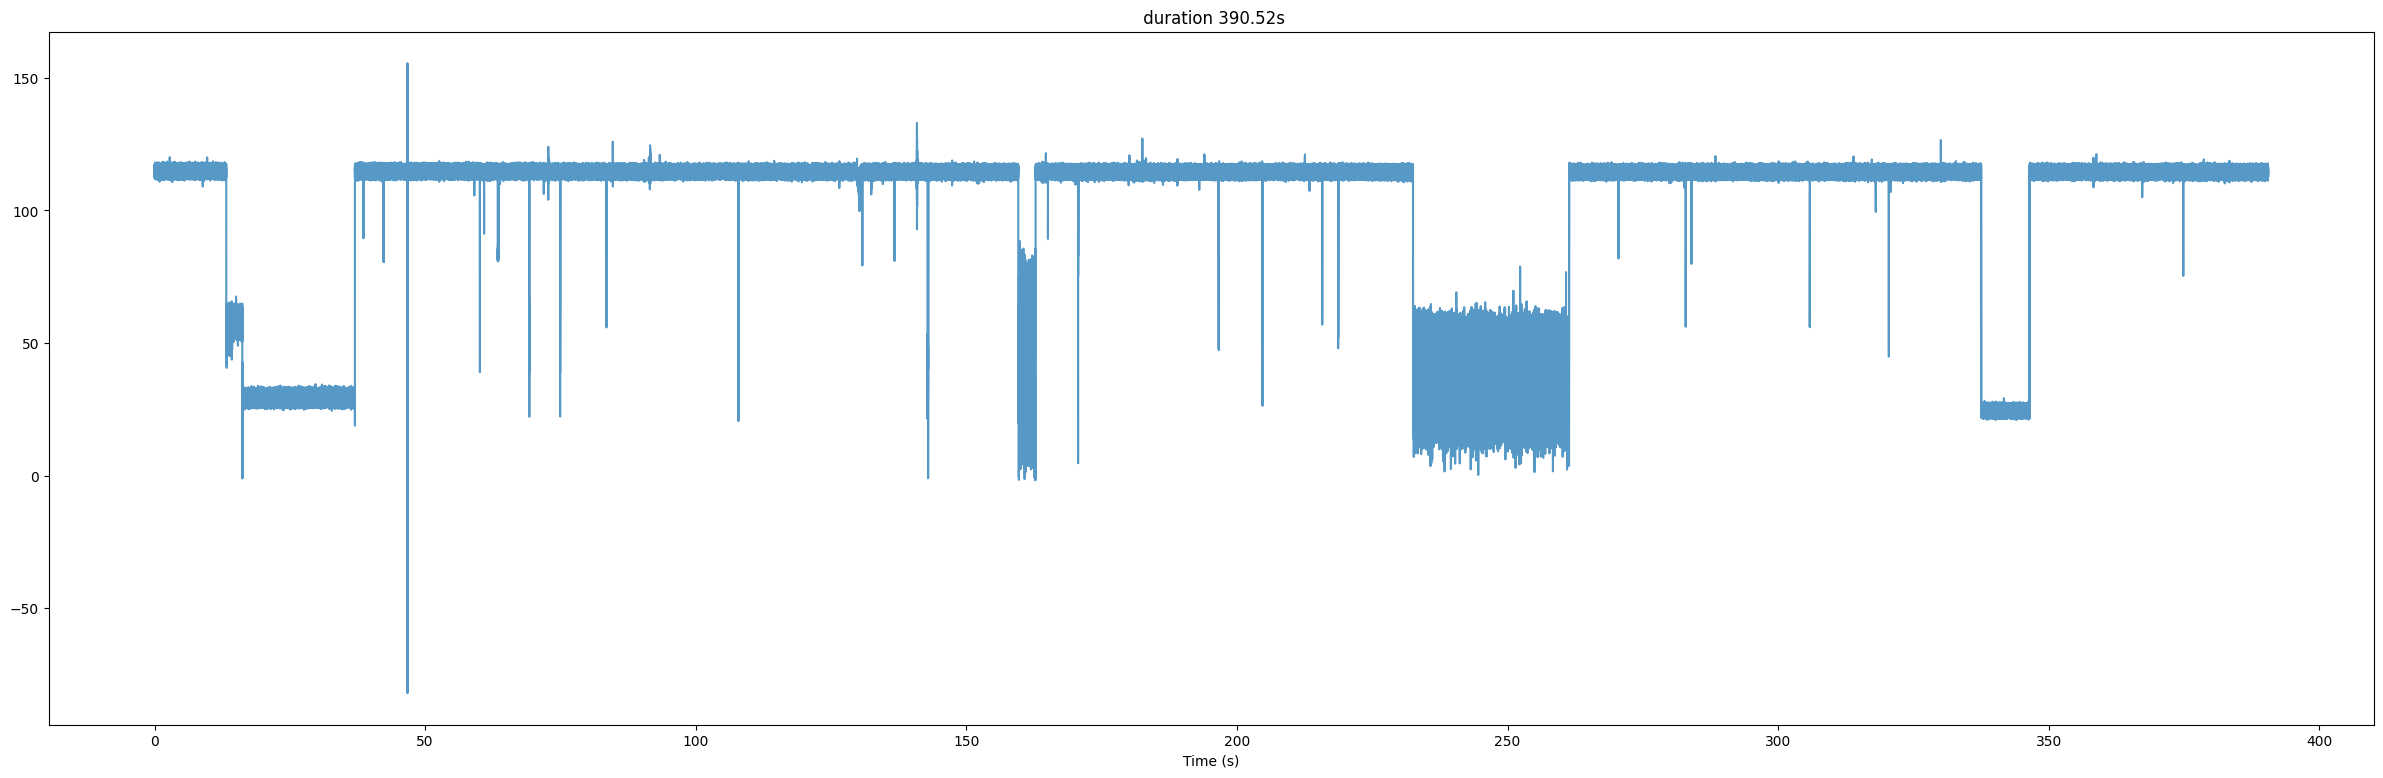

In [ ]:
arr_06210004 = dp.replace_outliers_with_bounds(arr_06210004)
fig = dv.plot_arr(arr_06210004)

In [ ]:
i_ranges, t_ranges = lf.find_events_arr(arr_06210004)
print(t_ranges)

[(13.2506, 37.0226), (159.5826, 159.8202), (160.9006, 161.5216), (161.5218, 161.9652), (162.4006, 162.7638), (232.5342, 261.3526), (337.4858, 346.457)]


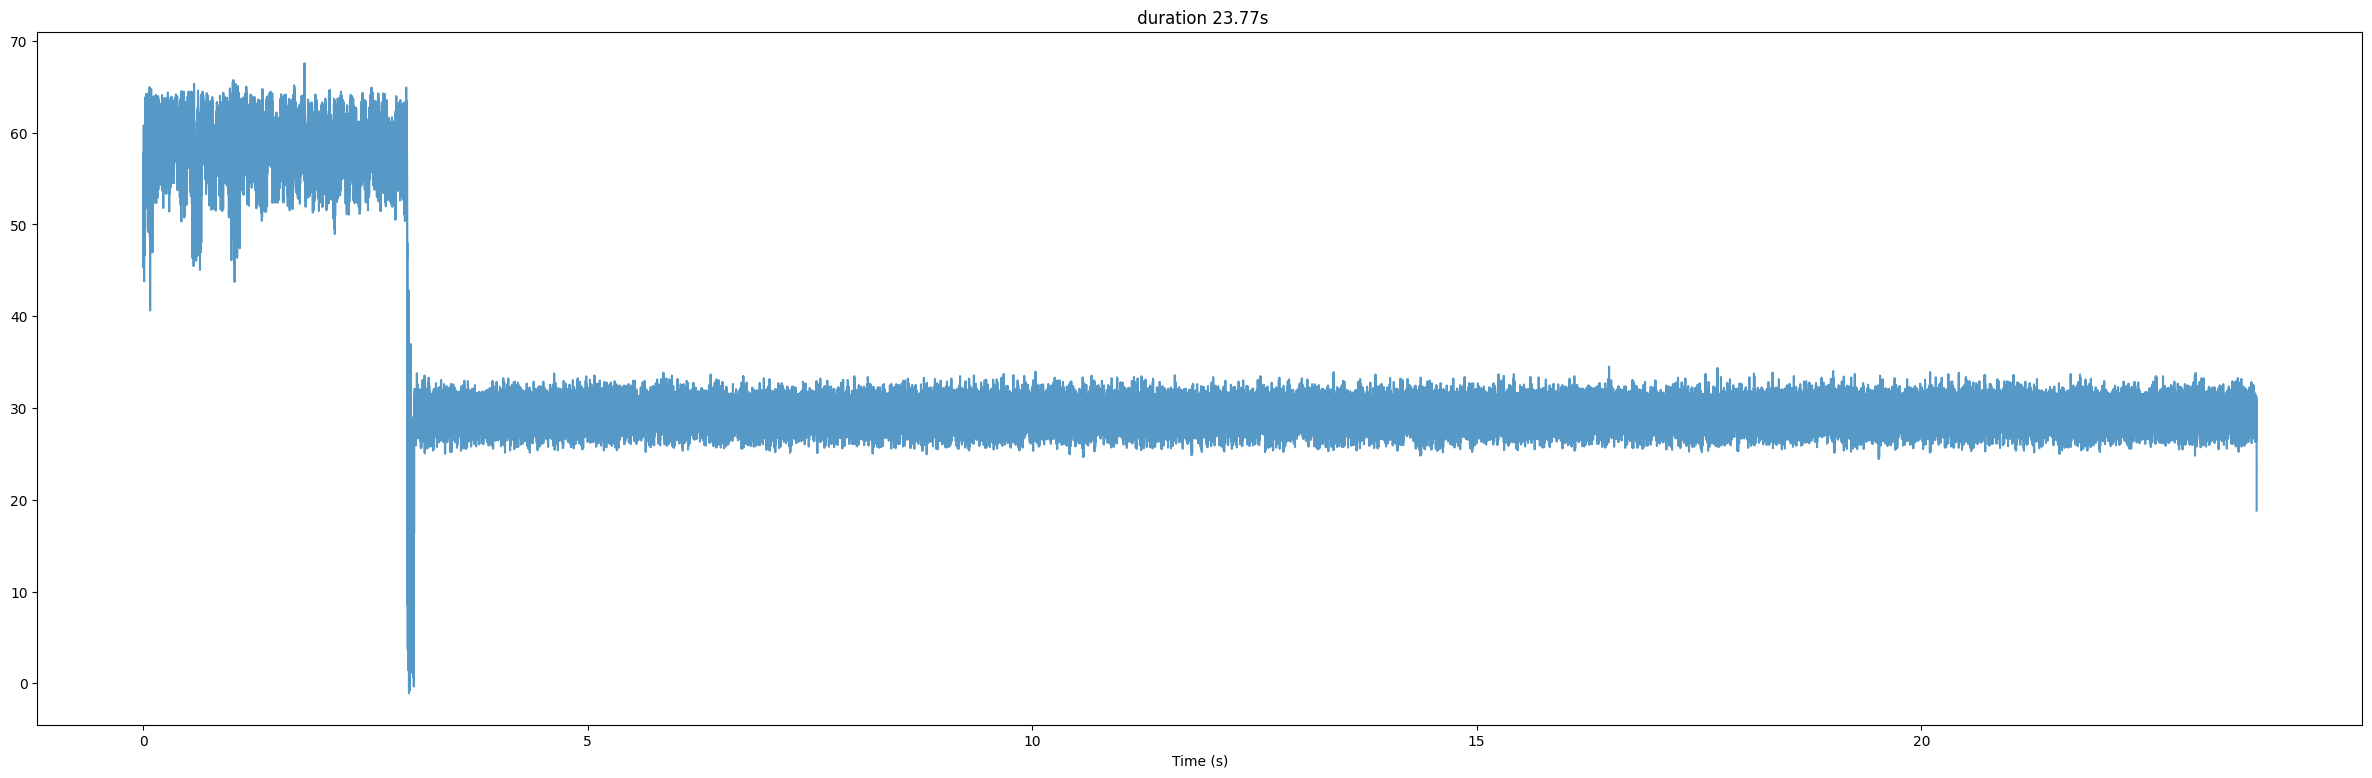

In [ ]:
fig=dv.plot_arr(arr_06210004[i_ranges[0][0]:i_ranges[0][1]])

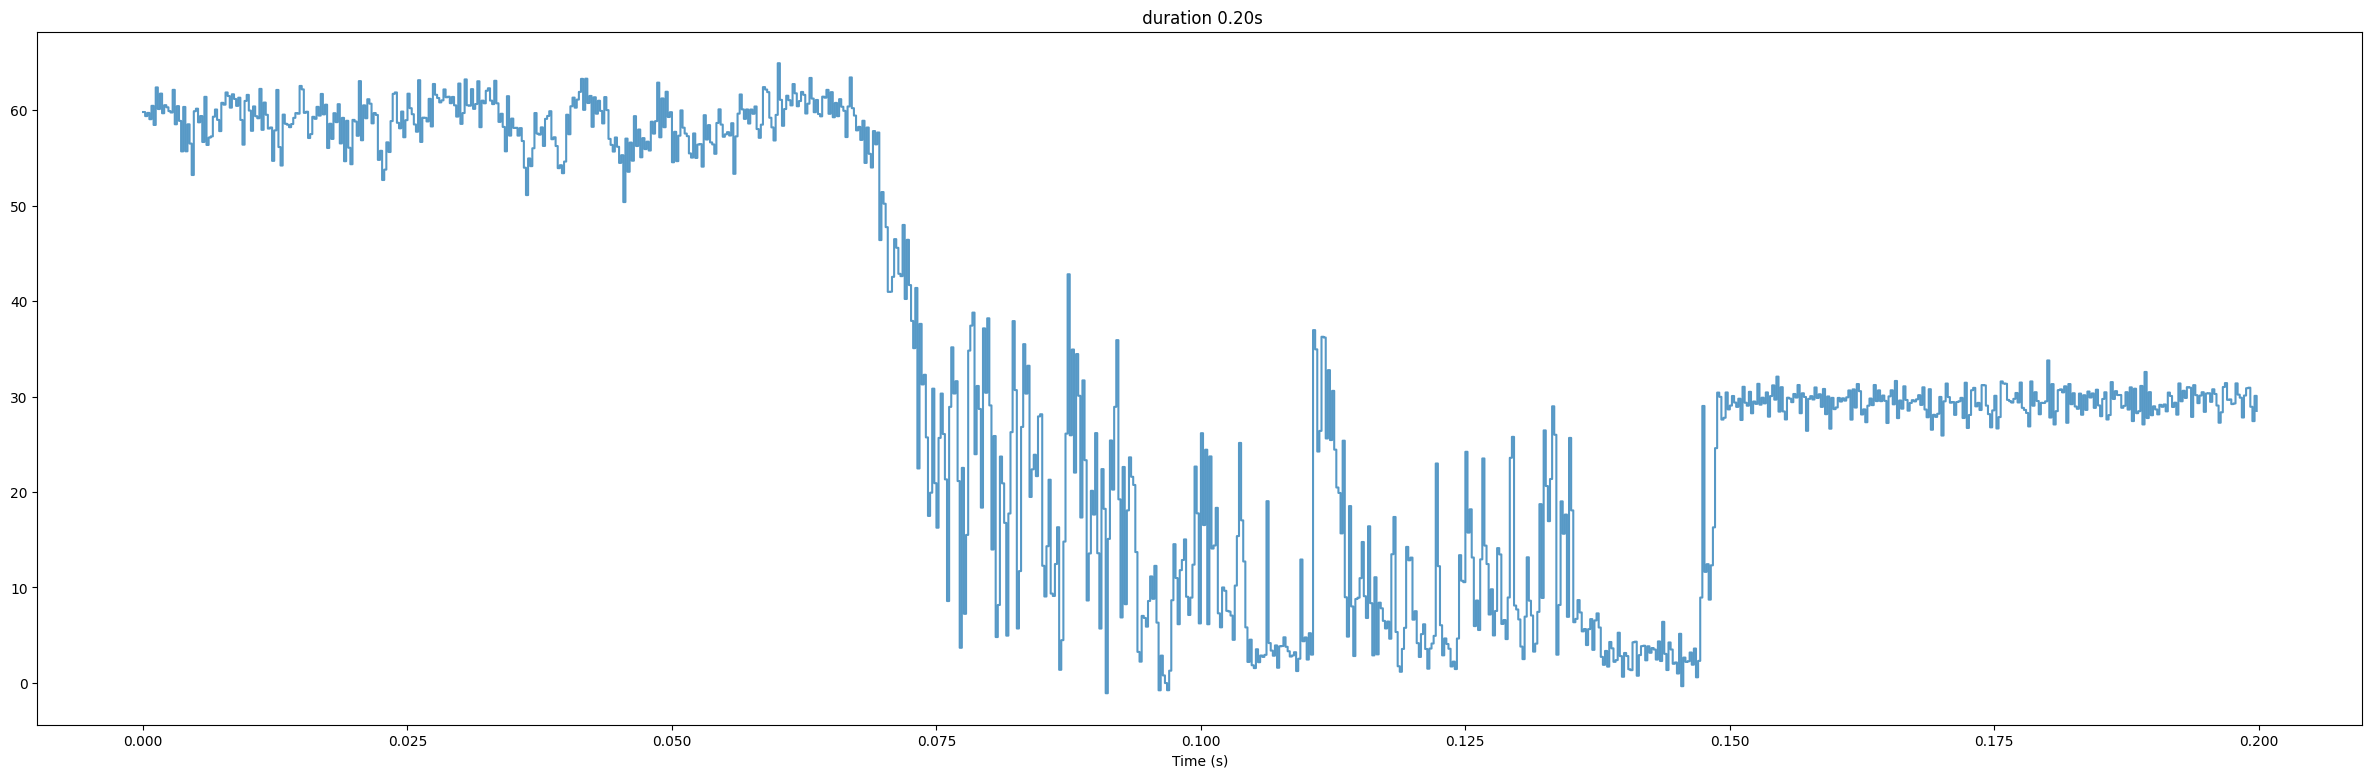

In [ ]:
fig = dv.plot_arr(arr_06210004[i_ranges[0][0]+14500 : i_ranges[0][0]+15500])

In [ ]:
# 06210004_1 取第一个事件开始后的3.05秒---第一个事件结束
arr_06210004_1 = arr_06210004[i_ranges[0][0]+int(3.05*5000):i_ranges[0][1]]

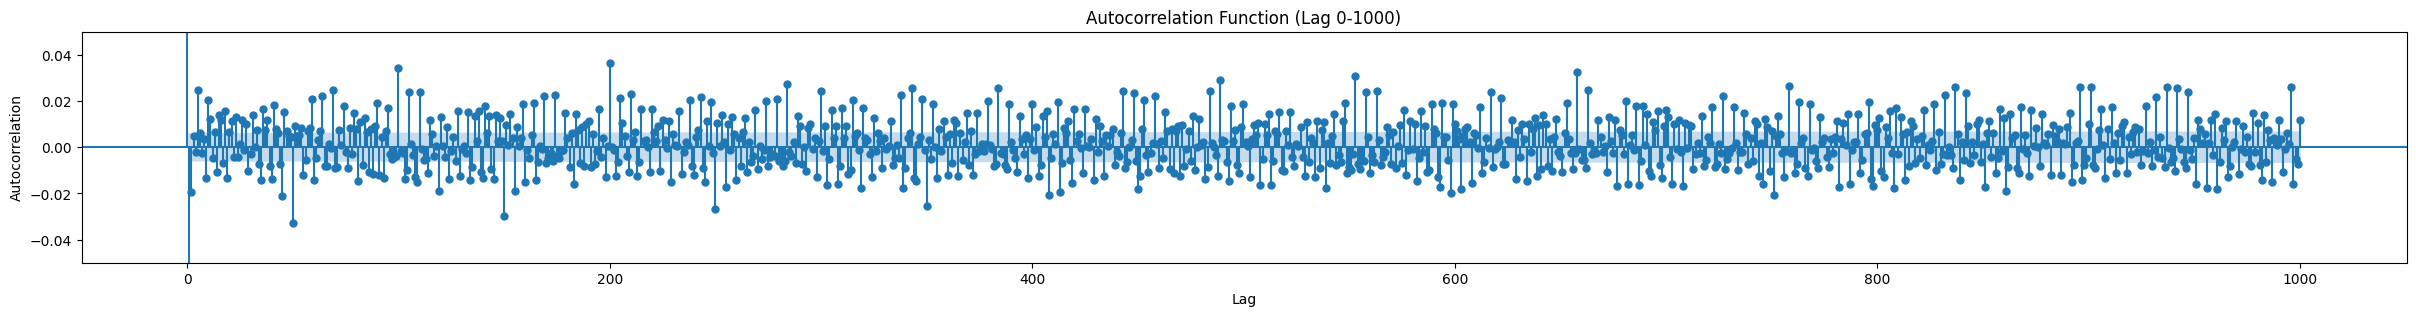

In [ ]:
# 周期性检测：自相关系数
plot_autocorrelation(arr_06210004_1,start_lag=0,end_lag=1000,ylim=(-0.05,0.05))

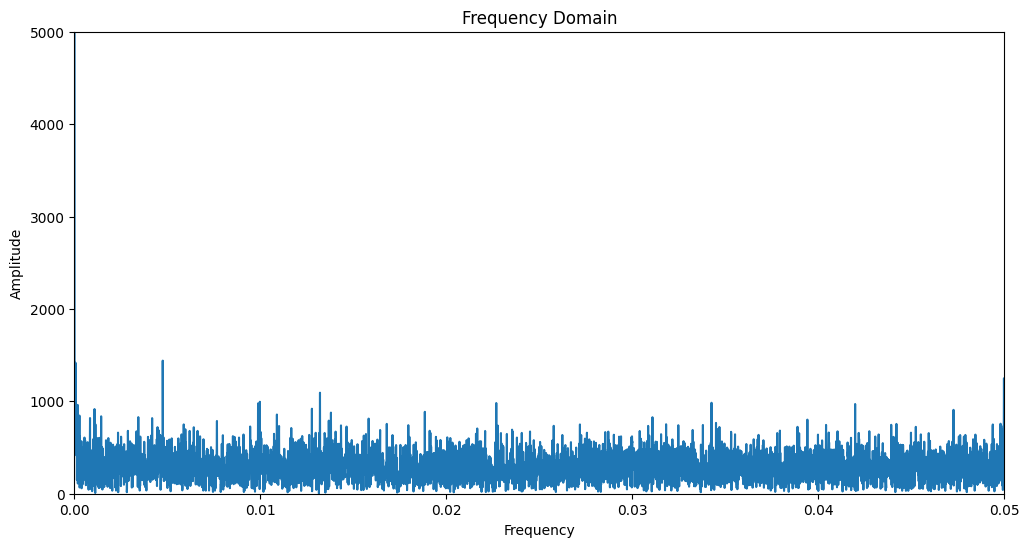

In [ ]:
# 周期性检测：傅里叶变换
fft_test(arr_06210004_1,5000)

The period of the time series is 2.559978257109678


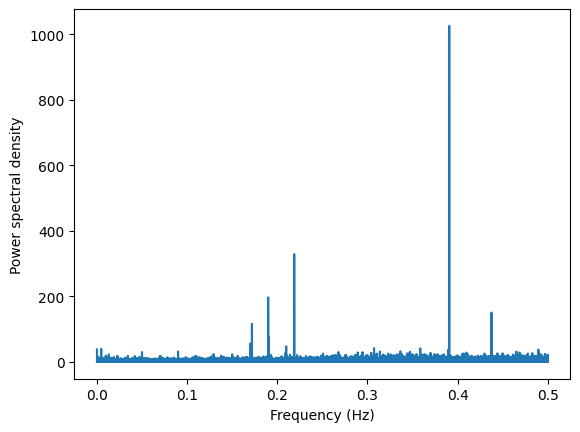

In [ ]:
# 周期性检测：功率谱密度(PSD)图
PSD_test(arr_06210004_1)

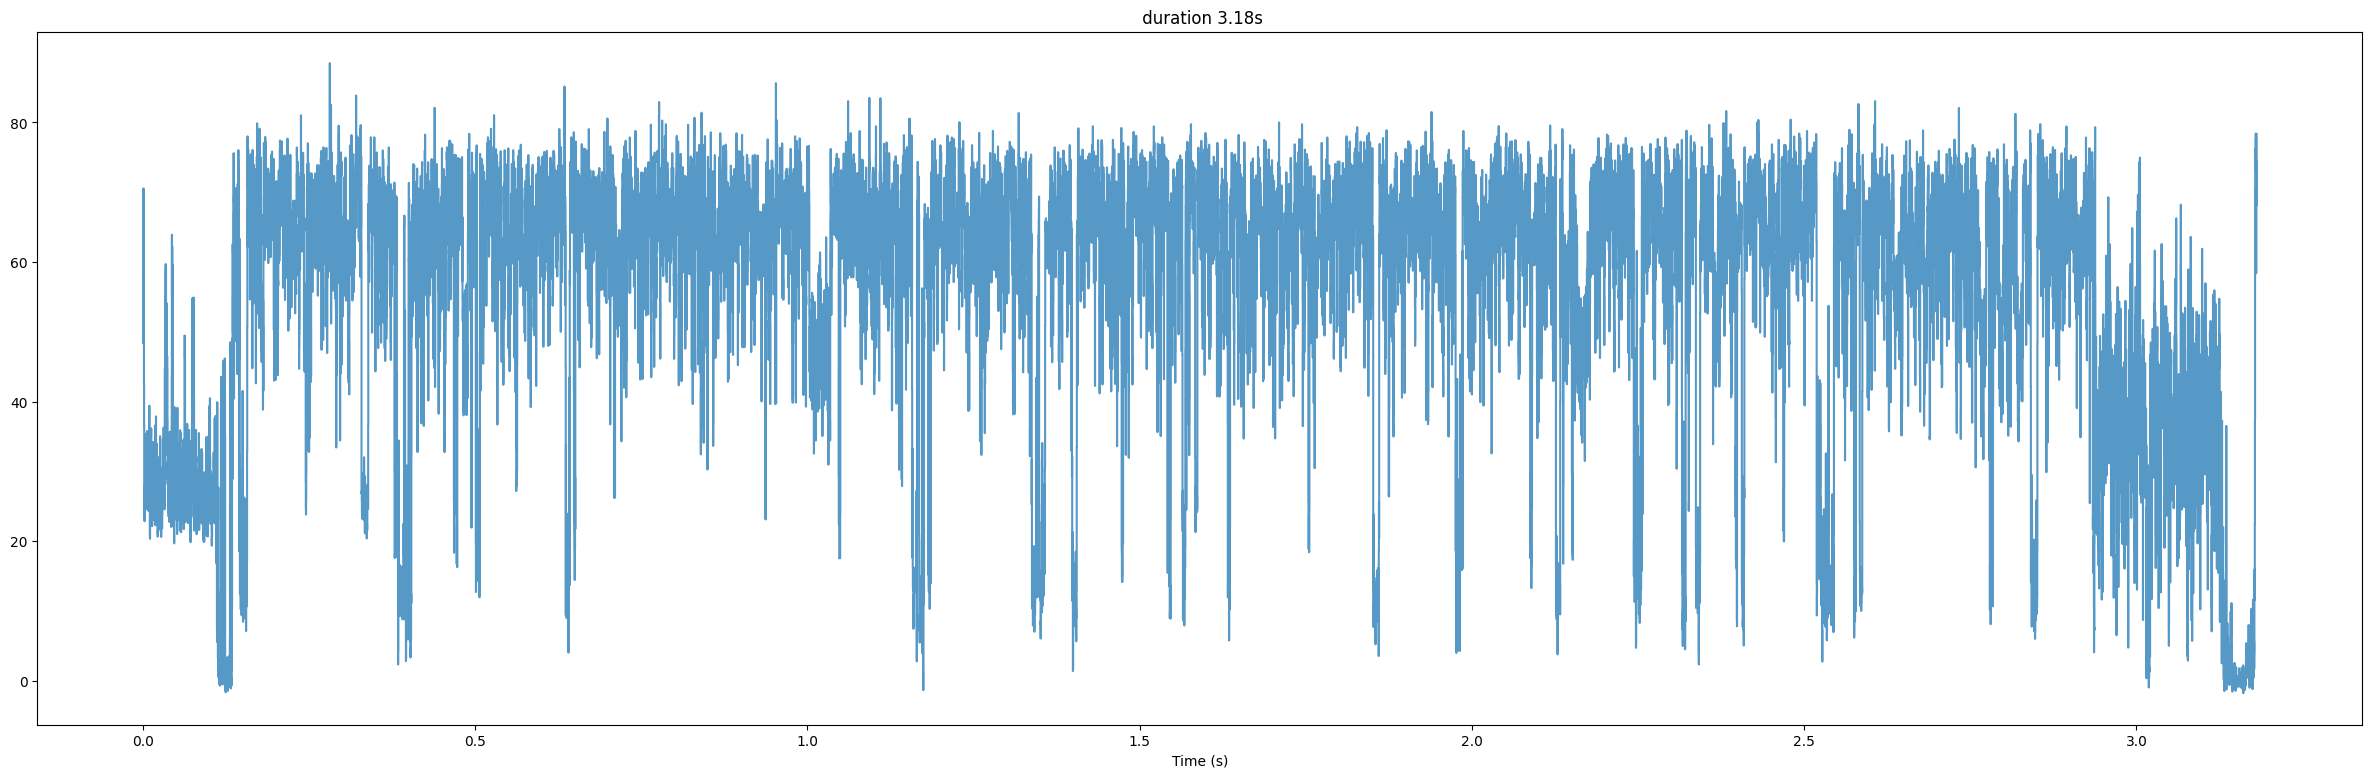

In [ ]:
fig = dv.plot_arr(arr_06210004[int(159.5826*5000) : int(162.7638 * 5000)])

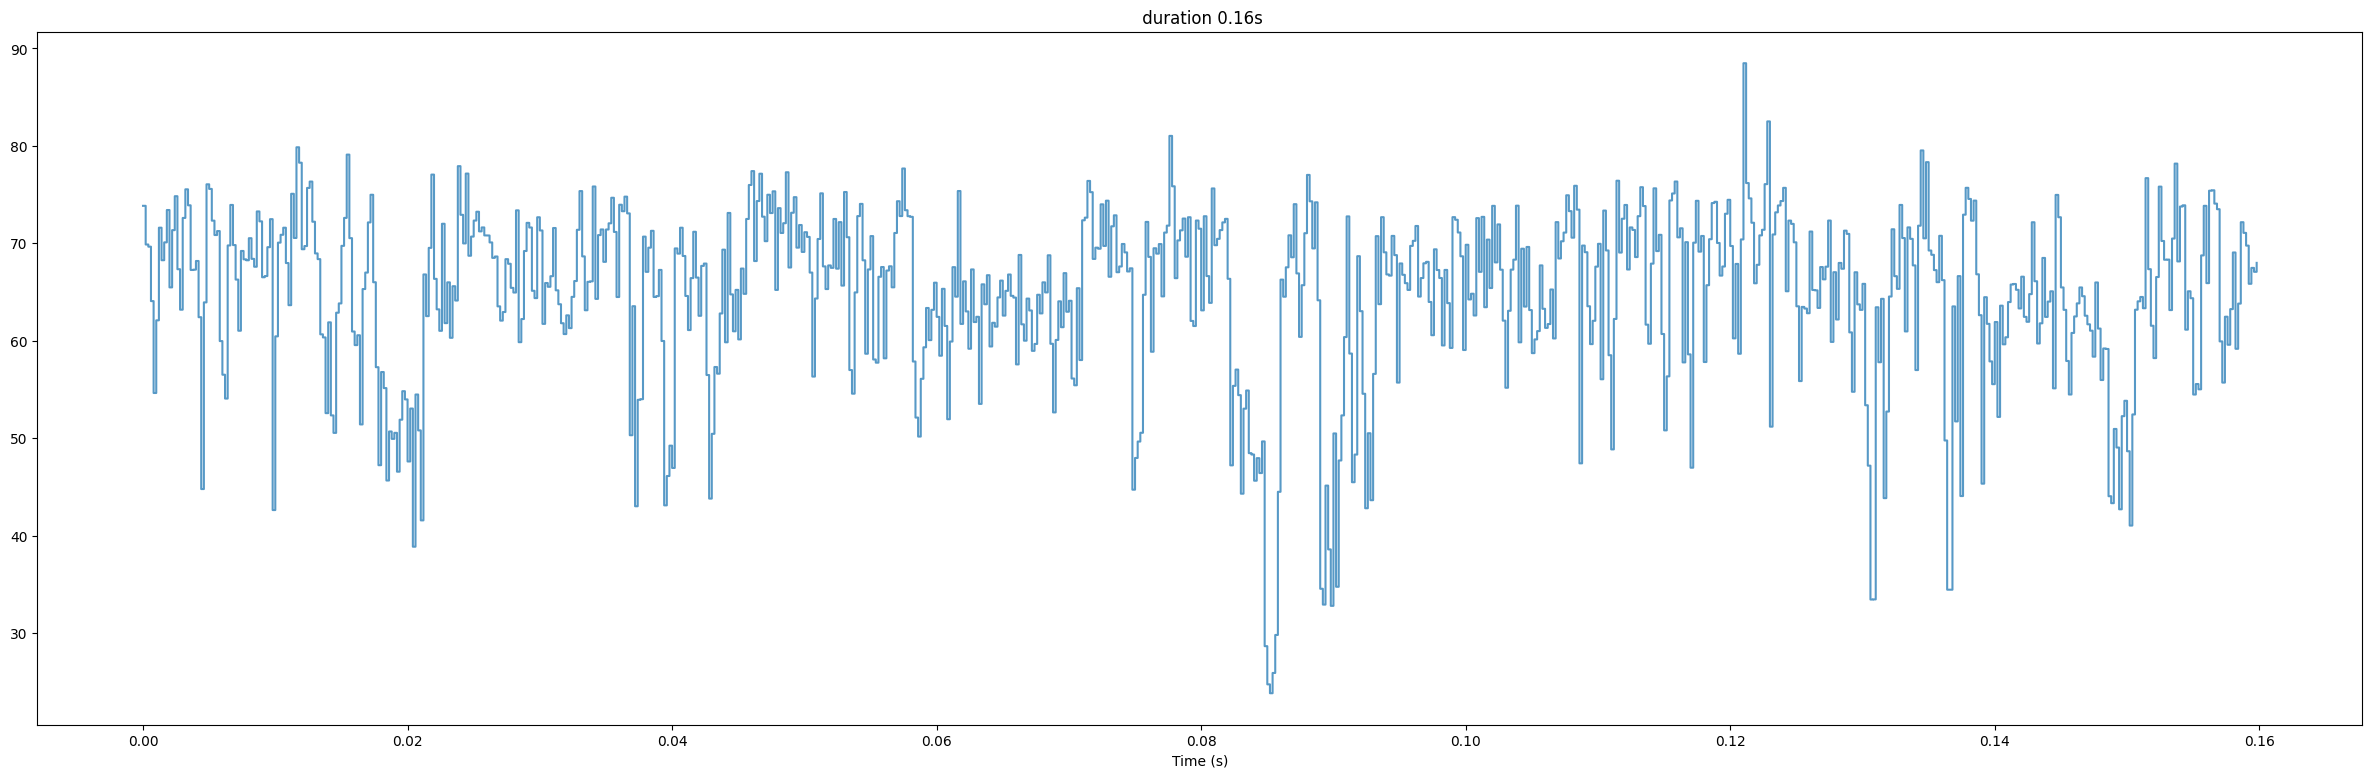

In [ ]:
fig = dv.plot_arr(arr_06210004[int((159.5826 + 0.16) * 5000) : int((159.5826 + 0.32) * 5000)])

In [ ]:
# 06210004_2 取第二个事件开始后的0.16秒---第二个事件开始后的0.32秒
arr_06210004_2 = arr_06210004[int((159.5826 + 0.16) * 5000) : int((159.5826 + 0.32) * 5000)]

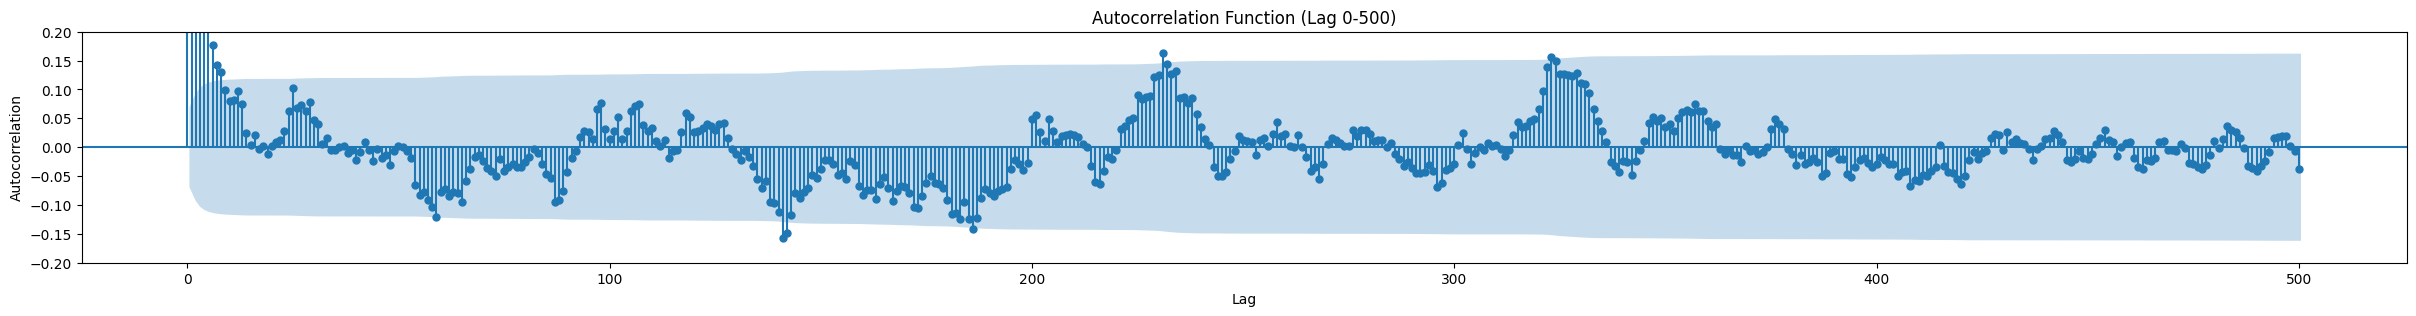

In [ ]:
# 周期性检测：自相关系数
plot_autocorrelation(arr_06210004_2,start_lag=0,end_lag=500,ylim=(-0.2,0.2))

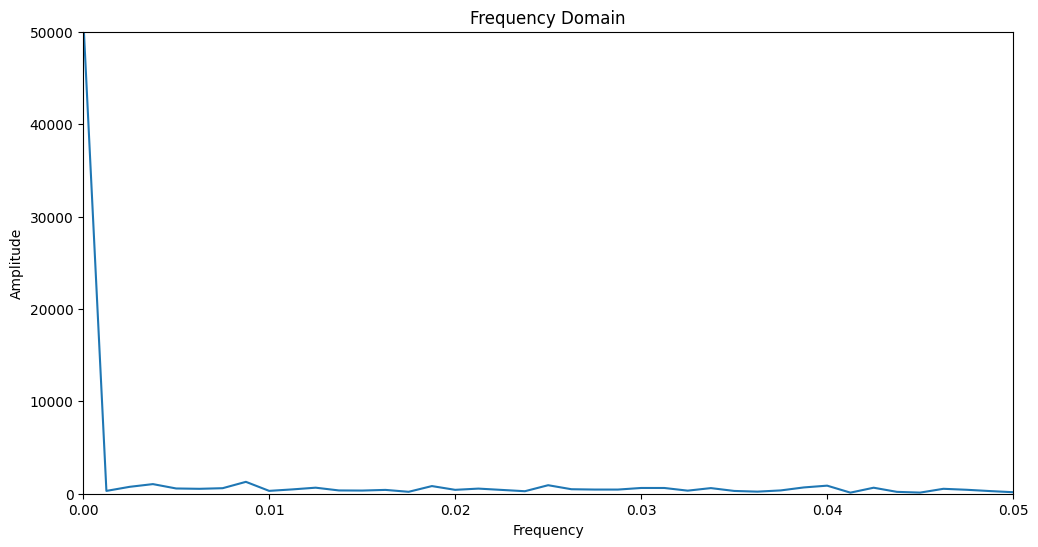

In [ ]:
# 周期性检测：傅里叶变换
fft_test(arr_06210004_2)

The period of the time series is 114.28571428571428


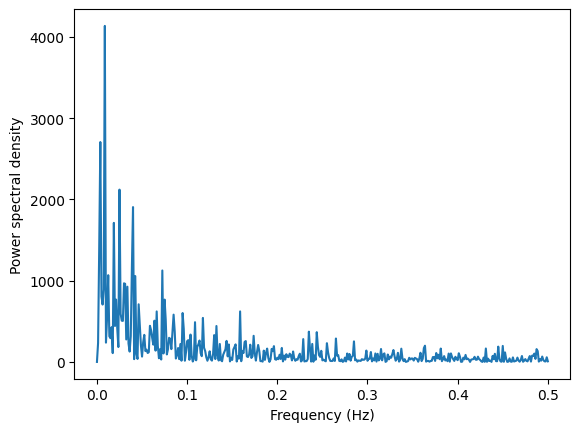

In [ ]:
# 周期性检测：功率谱密度(PSD)图
PSD_test(arr_06210004_2)

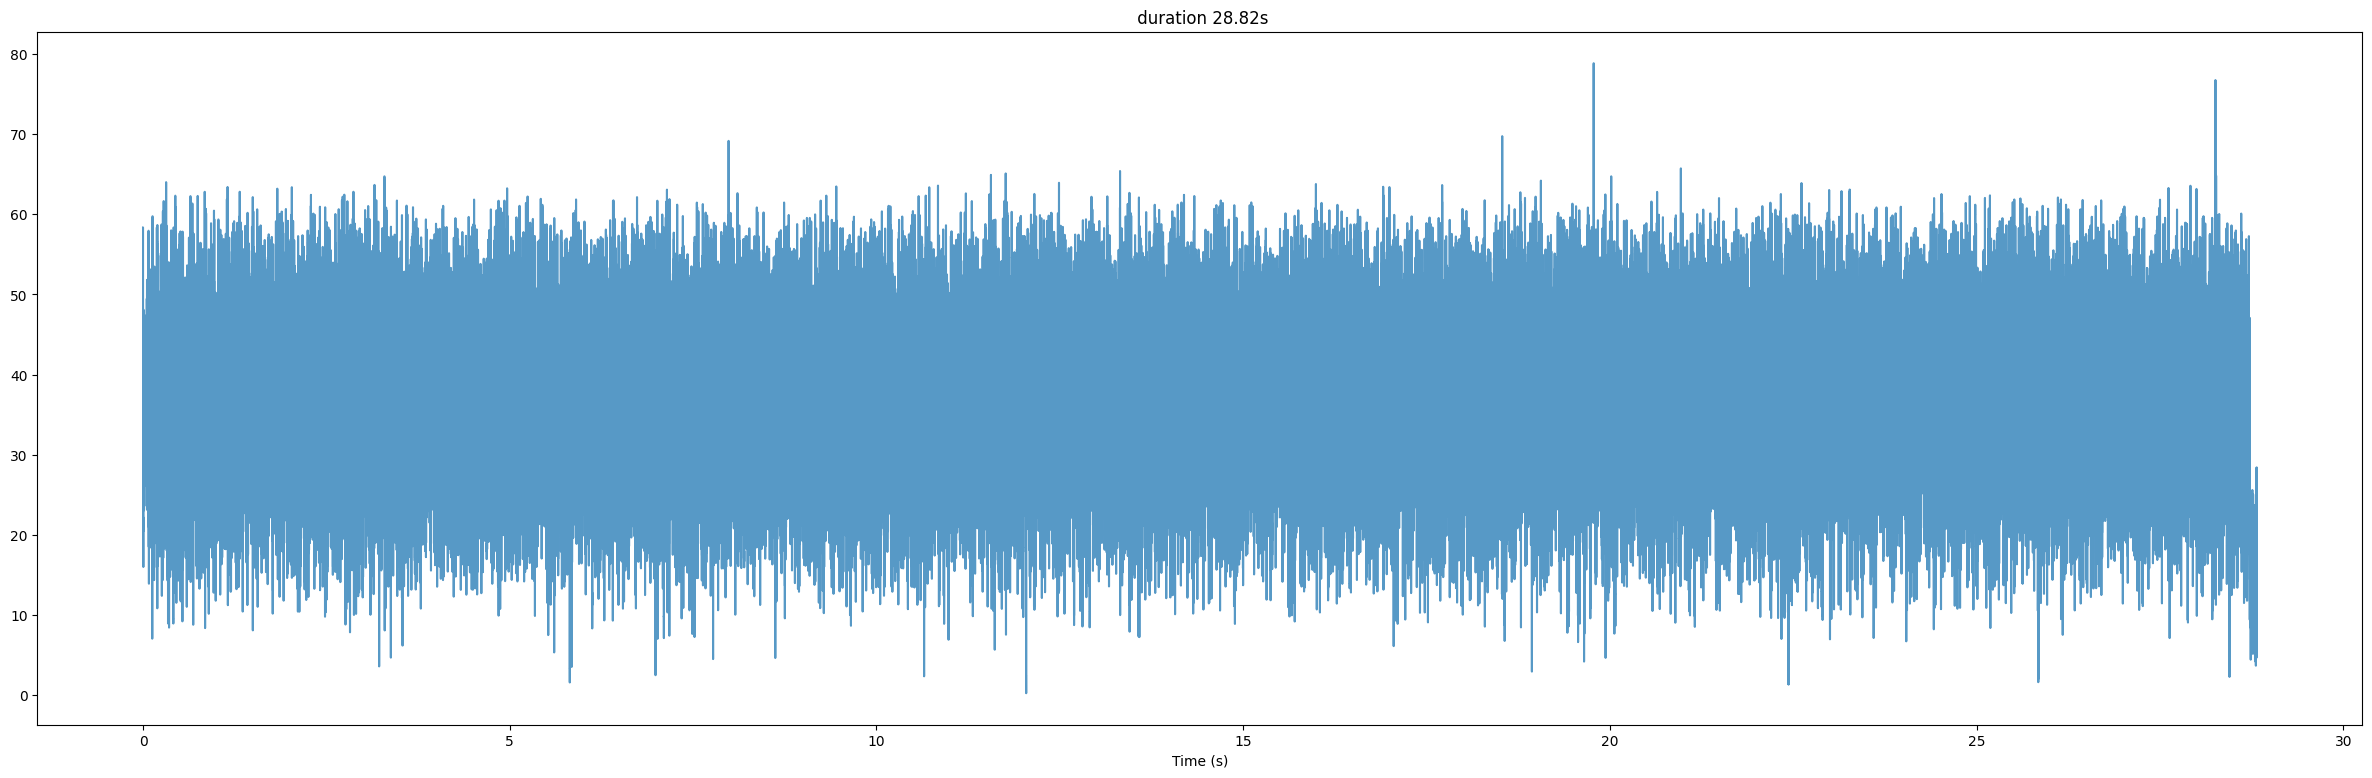

In [ ]:
fig = dv.plot_arr(arr_06210004[int(232.5342 * 5000) : int(261.3526*5000)])

In [ ]:
# 06210004_3 取第三个事件开始---第三个事件结束
arr_06210004_3 = arr_06210004[int(232.5342 * 5000) : int(261.3526*5000)]

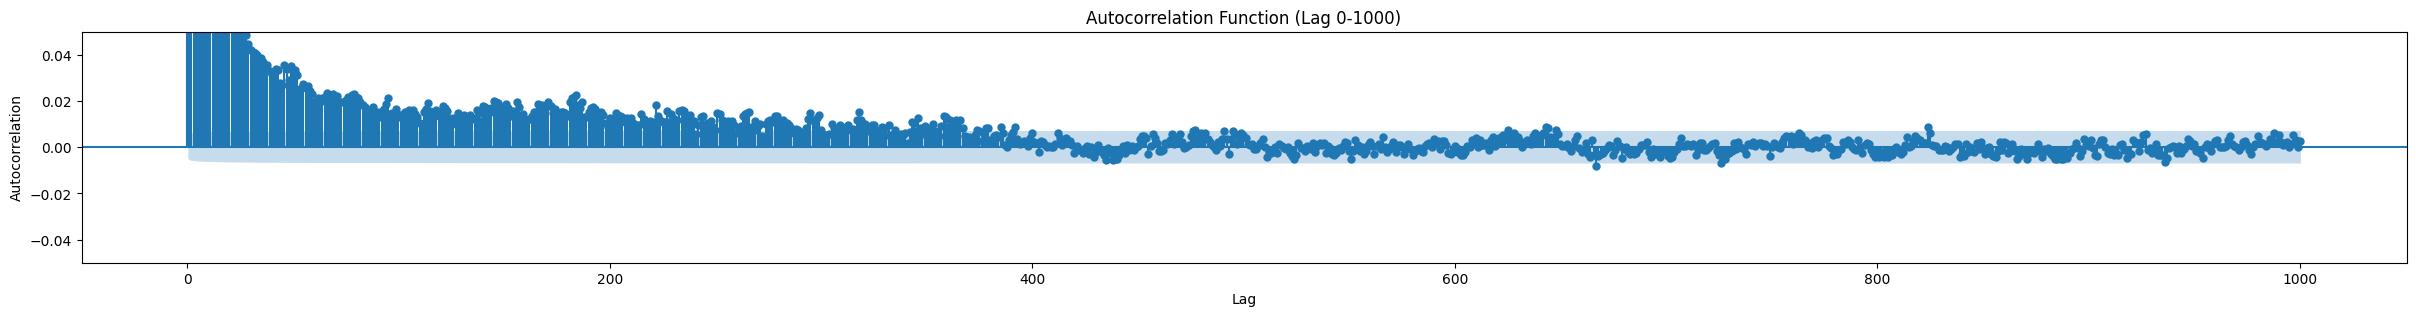

In [ ]:
# 周期性检测：自相关系数
plot_autocorrelation(arr_06210004_3,start_lag=0,end_lag=1000,ylim=(-0.05,0.05))

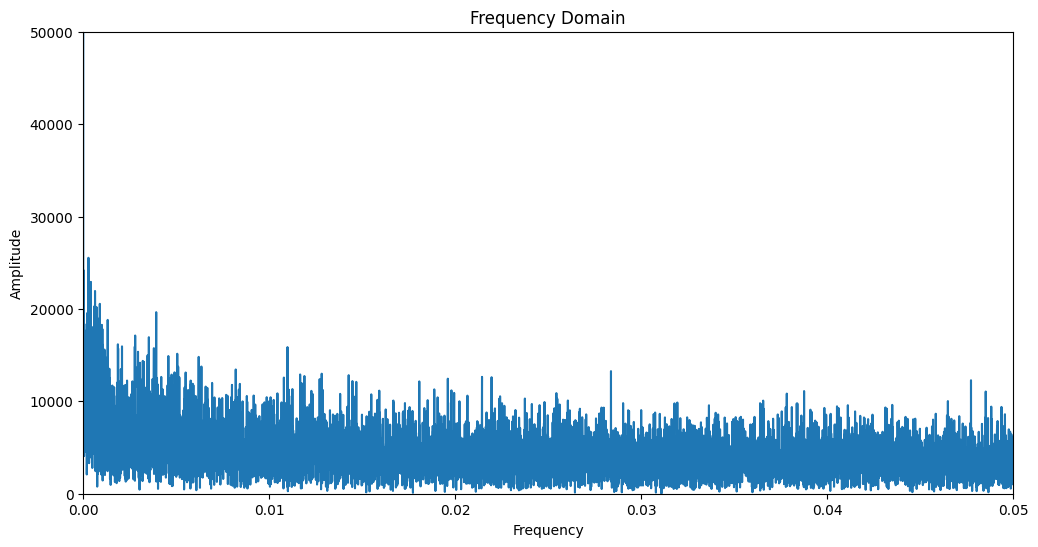

In [ ]:
# 周期性检测：傅里叶变换
fft_test(arr_06210004_3)

The period of the time series is 3514.439024390244


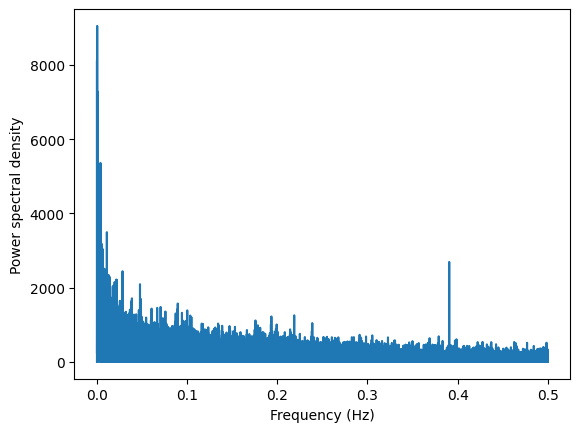

In [ ]:
# 周期性检测：功率谱密度(PSD)图
PSD_test(arr_06210004_3)

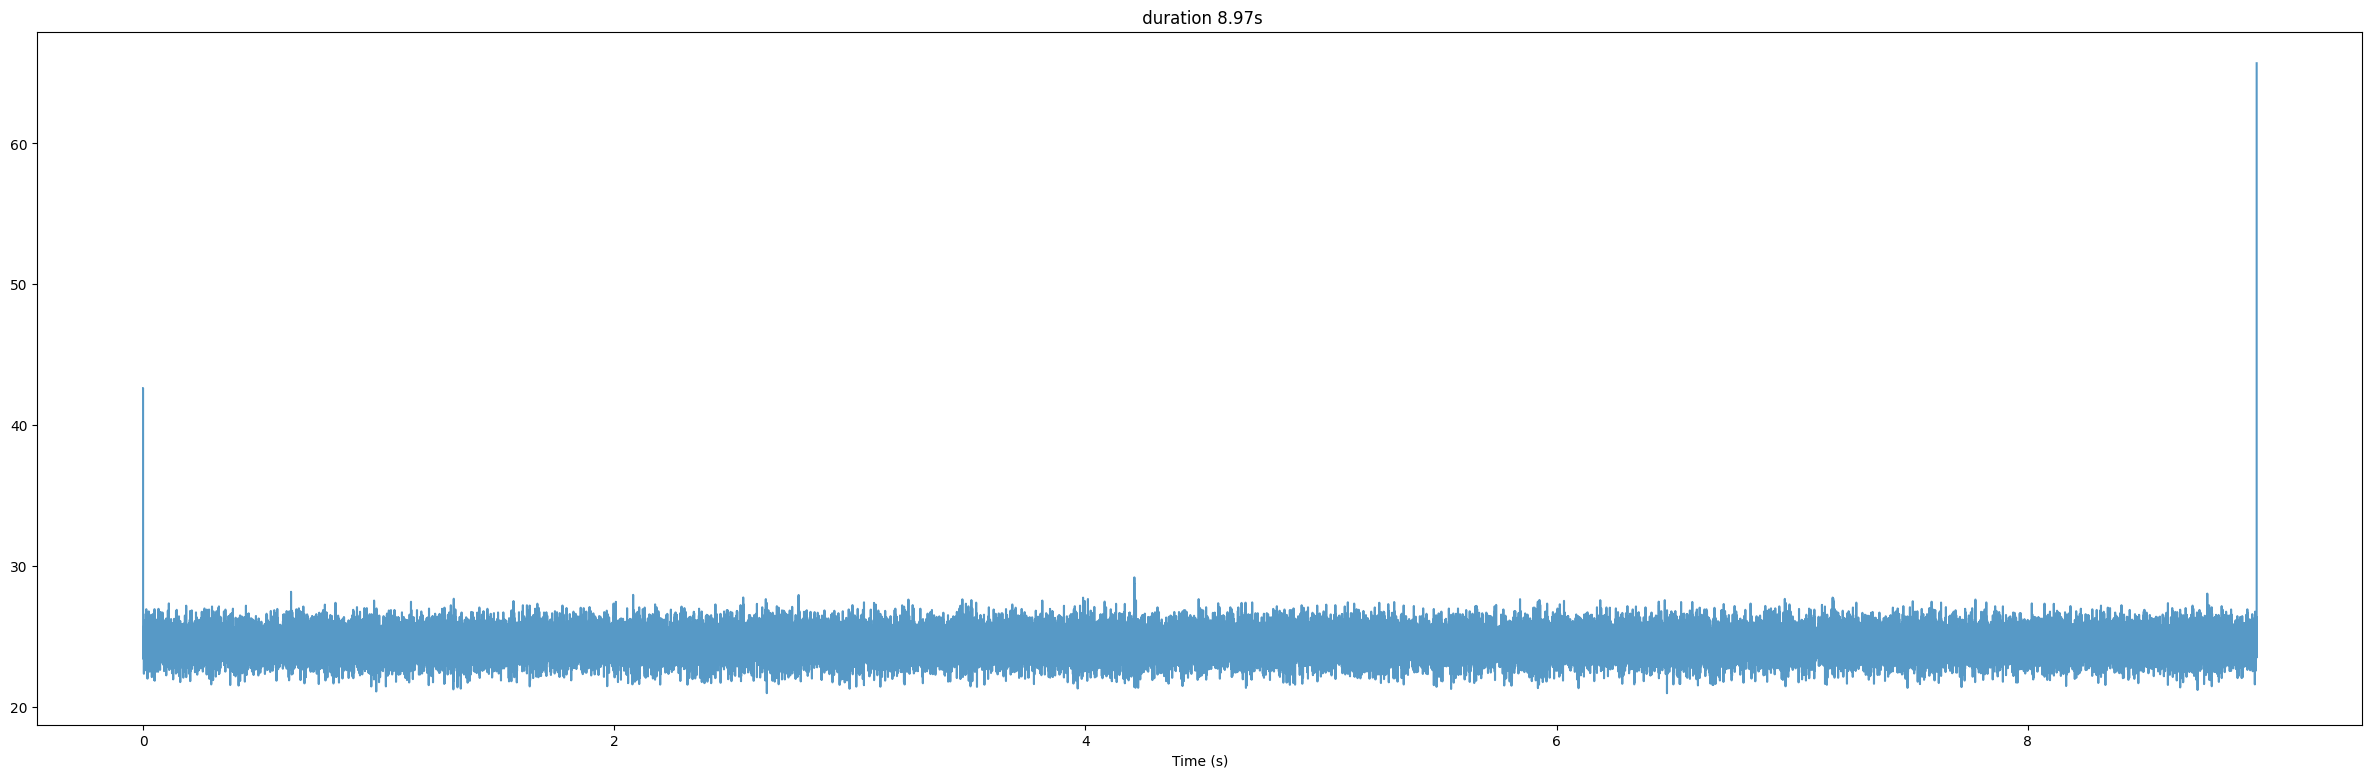

In [ ]:
fig=dv.plot_arr(arr_06210004[int(337.4858 * 5000) : int(346.457 * 5000)])

In [ ]:
# 06210004_4 取第四个事件开始---第四个事件结束
arr_06210004_4 = arr_06210004[int(337.4858 * 5000) : int(346.457 * 5000)]

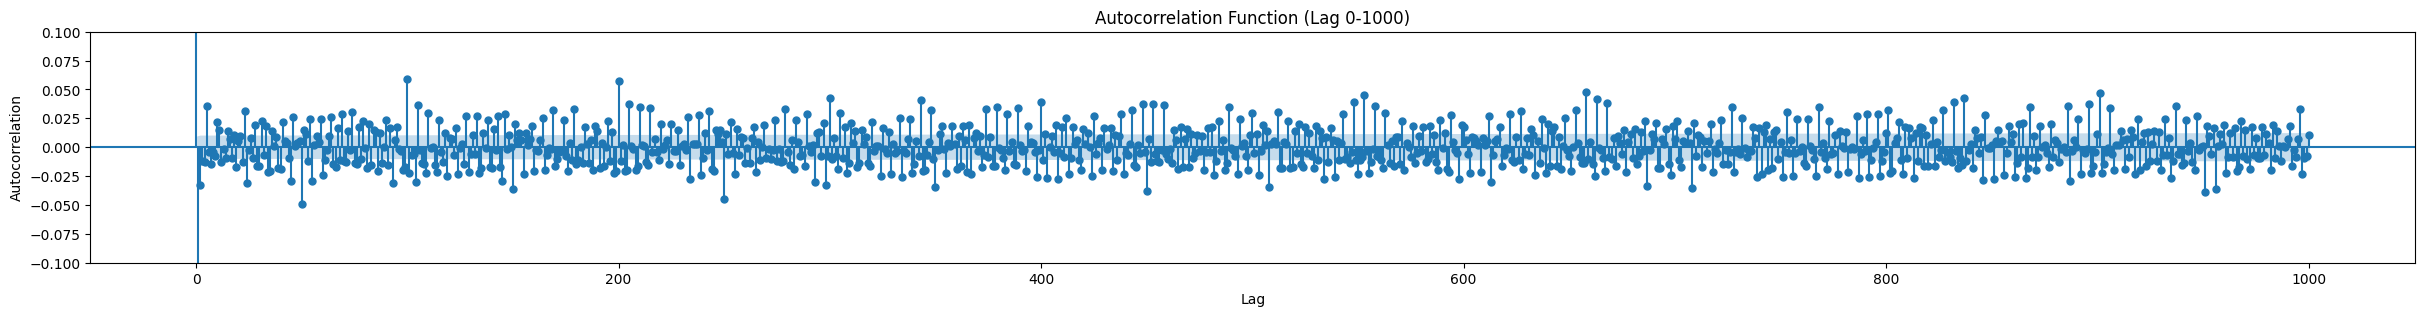

In [ ]:
# 周期性检测：自相关系数
plot_autocorrelation(arr_06210004_4,start_lag=0,end_lag=1000,ylim=(-0.1,0.1))

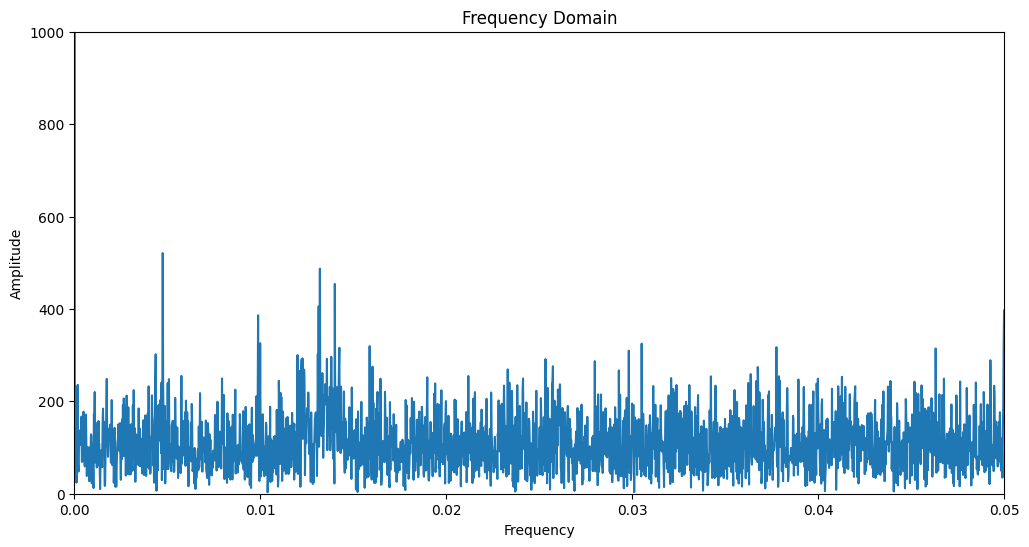

In [ ]:
# 周期性检测：傅里叶变换
fft_test(arr_06210004_4,ymax=1000)

The period of the time series is 2.5599817372446068


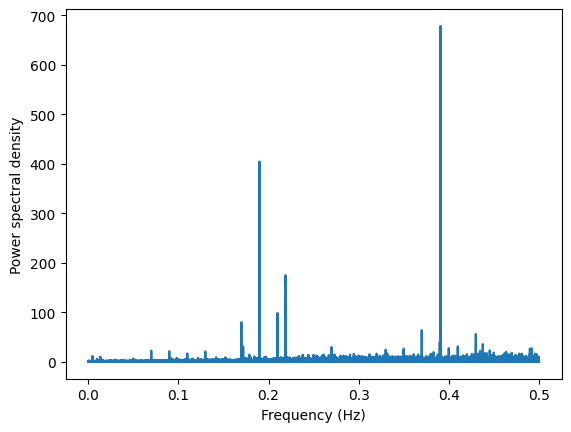

In [ ]:
# 周期性检测：功率谱密度(PSD)图
PSD_test(arr_06210004_4)